## Building a dataset to look at how change in democratic institutions is correlated with change in conflict

### Proxy for democratic institutions: 
- 3 year moving average of Polity4 for each country

### Proxy for conflict: 
- 3 year moving average of the maximum intensity (1 or 2) of the conflict due to civil wars in that year in that country from UCDP/PRIO armed conflict dataset
- 3 year moving average of battle deaths per 100,000 people due to civil wars in that year in that country from UCDP and PRIO battle deaths dataset. PRIO data was uesd for 1950-2008 and UCDP data was used for 2009-2015

In [880]:
import pandas as pd
import numpy as np


%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

### First prepare the polity 4 data

In [881]:
polityIVAll = pd.read_excel('p4v2015.xls')

In [882]:
polityIVAll = polityIVAll[polityIVAll['year'] >= 1950]

In [883]:
polityIVAll.head()

cyear  ccode scode      country  year  flag  fragment  democ  autoc  \
150  7001950    700   AFG  Afghanistan  1950     0       NaN      0     10   
151  7001951    700   AFG  Afghanistan  1951     0       NaN      0     10   
152  7001952    700   AFG  Afghanistan  1952     0       NaN      0     10   
153  7001953    700   AFG  Afghanistan  1953     0       NaN      0     10   
154  7001954    700   AFG  Afghanistan  1954     0       NaN      0     10   

     polity    ...     interim  bmonth  bday  byear  bprec  post  change  d4  \
150     -10    ...         NaN     NaN   NaN    NaN    NaN   NaN     NaN NaN   
151     -10    ...         NaN     NaN   NaN    NaN    NaN   NaN     NaN NaN   
152     -10    ...         NaN     NaN   NaN    NaN    NaN   NaN     NaN NaN   
153     -10    ...         NaN     NaN   NaN    NaN    NaN   NaN     NaN NaN   
154     -10    ...         NaN     NaN   NaN    NaN    NaN   NaN     NaN NaN   

     sf  regtrans  
150 NaN       NaN  
151 NaN       NaN  
152 NaN       NaN  
153 NaN       NaN  
154 NaN       NaN  

[5 rows x 36 columns]

In [884]:
polityIV = polityIVAll[['cyear','ccode','scode','country','year','polity']]


In [885]:
polityIV = polityIV[(polityIV['polity'] <= 10) & (polityIV['polity'] >= -10)]

In [886]:
# Calculate moving average and difference - prelimiaries

polityIV.ix[:,'polity_moving_avg'] = 0
polityIV.ix[:,'delta_polity_moving_avg'] = np.nan

all_countries = polityIV['country'].unique()

In [887]:
# Calculate moving average - main loop

for c in all_countries:
    polityIV.loc[polityIV['country']==c,'polity_moving_avg'] = \
        polityIV.loc[polityIV['country']==c,'polity'].rolling(window=3, center=True).mean()
    polityIV.loc[polityIV['country']==c,'delta_polity_moving_avg'] = \
        polityIV.loc[polityIV['country']==c,'polity_moving_avg'].diff()
    

In [888]:
polityIV['ccode'] = polityIV['ccode'].astype(str)

In [889]:
polityIV[polityIV['country']=='Myanmar (Burma)']


cyear ccode scode          country  year  polity  polity_moving_avg  \
9748  7751950   775   MYA  Myanmar (Burma)  1950       8                NaN   
9749  7751951   775   MYA  Myanmar (Burma)  1951       8           8.000000   
9750  7751952   775   MYA  Myanmar (Burma)  1952       8           8.000000   
9751  7751953   775   MYA  Myanmar (Burma)  1953       8           8.000000   
9752  7751954   775   MYA  Myanmar (Burma)  1954       8           8.000000   
9753  7751955   775   MYA  Myanmar (Burma)  1955       8           8.000000   
9754  7751956   775   MYA  Myanmar (Burma)  1956       8           8.000000   
9755  7751957   775   MYA  Myanmar (Burma)  1957       8           8.000000   
9756  7751958   775   MYA  Myanmar (Burma)  1958       8           8.000000   
9757  7751959   775   MYA  Myanmar (Burma)  1959       8           8.000000   
9758  7751960   775   MYA  Myanmar (Burma)  1960       8           8.000000   
9759  7751961   775   MYA  Myanmar (Burma)  1961       8           3.333333   
9760  7751962   775   MYA  Myanmar (Burma)  1962      -6          -1.666667   
9761  7751963   775   MYA  Myanmar (Burma)  1963      -7          -6.666667   
9762  7751964   775   MYA  Myanmar (Burma)  1964      -7          -7.000000   
9763  7751965   775   MYA  Myanmar (Burma)  1965      -7          -7.000000   
9764  7751966   775   MYA  Myanmar (Burma)  1966      -7          -7.000000   
9765  7751967   775   MYA  Myanmar (Burma)  1967      -7          -7.000000   
9766  7751968   775   MYA  Myanmar (Burma)  1968      -7          -7.000000   
9767  7751969   775   MYA  Myanmar (Burma)  1969      -7          -7.000000   
9768  7751970   775   MYA  Myanmar (Burma)  1970      -7          -7.000000   
9769  7751971   775   MYA  Myanmar (Burma)  1971      -7          -7.000000   
9770  7751972   775   MYA  Myanmar (Burma)  1972      -7          -7.000000   
9771  7751973   775   MYA  Myanmar (Burma)  1973      -7          -6.666667   
9772  7751974   775   MYA  Myanmar (Burma)  1974      -6          -6.333333   
9773  7751975   775   MYA  Myanmar (Burma)  1975      -6          -6.000000   
9774  7751976   775   MYA  Myanmar (Burma)  1976      -6          -6.000000   
9775  7751977   775   MYA  Myanmar (Burma)  1977      -6          -6.000000   
9776  7751978   775   MYA  Myanmar (Burma)  1978      -6          -6.000000   
9777  7751979   775   MYA  Myanmar (Burma)  1979      -6          -6.666667   
...       ...   ...   ...              ...   ...     ...                ...   
9783  7751985   775   MYA  Myanmar (Burma)  1985      -8          -8.000000   
9784  7751986   775   MYA  Myanmar (Burma)  1986      -8          -8.000000   
9785  7751987   775   MYA  Myanmar (Burma)  1987      -8          -7.333333   
9786  7751988   775   MYA  Myanmar (Burma)  1988      -6          -6.666667   
9787  7751989   775   MYA  Myanmar (Burma)  1989      -6          -6.333333   
9788  7751990   775   MYA  Myanmar (Burma)  1990      -7          -6.666667   
9789  7751991   775   MYA  Myanmar (Burma)  1991      -7          -7.000000   
9790  7751992   775   MYA  Myanmar (Burma)  1992      -7          -7.000000   
9791  7751993   775   MYA  Myanmar (Burma)  1993      -7          -7.000000   
9792  7751994   775   MYA  Myanmar (Burma)  1994      -7          -7.000000   
9793  7751995   775   MYA  Myanmar (Burma)  1995      -7          -7.000000   
9794  7751996   775   MYA  Myanmar (Burma)  1996      -7          -7.000000   
9795  7751997   775   MYA  Myanmar (Burma)  1997      -7          -7.000000   
9796  7751998   775   MYA  Myanmar (Burma)  1998      -7          -7.000000   
9797  7751999   775   MYA  Myanmar (Burma)  1999      -7          -7.000000   
9798  7752000   775   MYA  Myanmar (Burma)  2000      -7          -7.000000   
9799  7752001   775   MYA  Myanmar (Burma)  2001      -7          -7.000000   
9800  7752002   775   MYA  Myanmar (Burma)  2002      -7          -7.000000   
9801  7752003   775   MYA  Myanmar (Burma)  2003      -7  

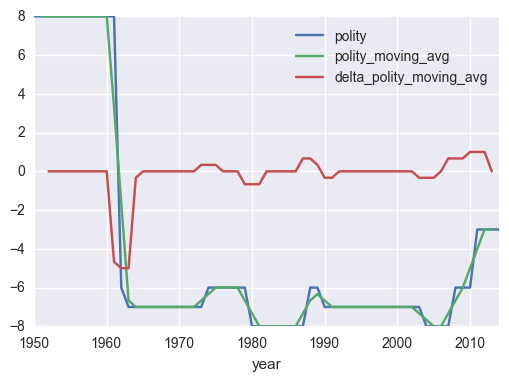

In [890]:
plt.figure(); polityIV.loc[polityIV['country']=='Myanmar (Burma)',['year','polity','polity_moving_avg','delta_polity_moving_avg']] \
    .plot(x='year',y=['polity','polity_moving_avg','delta_polity_moving_avg']);

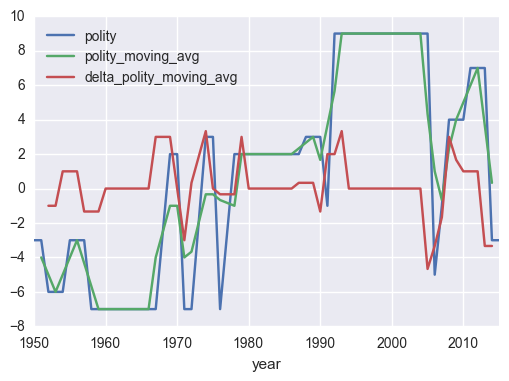

In [891]:
plt.figure(); polityIV.loc[polityIV['country']=='Thailand',['year','polity','polity_moving_avg','delta_polity_moving_avg']] \
    .plot(x='year',y=['polity','polity_moving_avg','delta_polity_moving_avg']);

### Now prepare the conflict data

In [892]:
conflictAll = pd.read_csv('ucdp-prio-acd-4-2016.csv')

In [893]:
conflict = conflictAll[['Location','SideA','SideA2nd','SideBID','Year','IntensityLevel','TypeOfConflict','GWNoA']]
conflict = conflict[conflict['TypeOfConflict'] >= 3]

In [894]:
conflict[conflict['Location']=='Indonesia']

Location                    SideA SideA2nd           SideBID  Year  \
878  Indonesia  Government of Indonesia      NaN              1056  1950   
879  Indonesia  Government of Indonesia      NaN              1059  1953   
880  Indonesia  Government of Indonesia      NaN  1059, 1060, 1061  1958   
881  Indonesia  Government of Indonesia      NaN  1059, 1060, 1061  1959   
882  Indonesia  Government of Indonesia      NaN  1059, 1060, 1061  1960   
883  Indonesia  Government of Indonesia      NaN  1059, 1060, 1061  1961   
884  Indonesia  Government of Indonesia      NaN              1108  1965   
885  Indonesia  Government of Indonesia      NaN              1108  1967   
886  Indonesia  Government of Indonesia      NaN              1108  1968   
887  Indonesia  Government of Indonesia      NaN              1108  1969   
888  Indonesia  Government of Indonesia      NaN              1108  1976   
889  Indonesia  Government of Indonesia      NaN              1108  1977   
890  Indonesia  Government of Indonesia      NaN              1108  1978   
891  Indonesia  Government of Indonesia      NaN              1108  1981   
892  Indonesia  Government of Indonesia      NaN              1108  1984   
893  Indonesia  Government of Indonesia      NaN              1132  1975   
894  Indonesia  Government of Indonesia      NaN              1132  1976   
895  Indonesia  Government of Indonesia      NaN              1132  1977   
896  Indonesia  Government of Indonesia      NaN              1132  1978   
897  Indonesia  Government of Indonesia      NaN              1132  1979   
898  Indonesia  Government of Indonesia      NaN              1132  1980   
899  Indonesia  Government of Indonesia      NaN              1132  1981   
900  Indonesia  Government of Indonesia      NaN              1132  1982   
901  Indonesia  Government of Indonesia      NaN              1132  1983   
902  Indonesia  Government of Indonesia      NaN              1132  1984   
903  Indonesia  Government of Indonesia      NaN              1132  1985   
904  Indonesia  Government of Indonesia      NaN              1132  1986   
905  Indonesia  Government of Indonesia      NaN              1132  1987   
906  Indonesia  Government of Indonesia      NaN              1132  1988   
907  Indonesia  Government of Indonesia      NaN              1132  1992   
908  Indonesia  Government of Indonesia      NaN              1132  1997   
909  Indonesia  Government of Indonesia      NaN              1132  1998   
910  Indonesia  Government of Indonesia      NaN              1132  1999   
911  Indonesia  Government of Indonesia      NaN              1170  1990   
912  Indonesia  Government of Indonesia      NaN              1170  1991   
913  Indonesia  Government of Indonesia      NaN              1170  1999   
914  Indonesia  Government of Indonesia      NaN              1170  2000   
915  Indonesia  Government of Indonesia      NaN              1170  2001   
916  Indonesia  Government of Indonesia      NaN              1170  2002   
917  Indonesia  Government of Indonesia      NaN              1170  2003   
918  Indonesia  Government of Indonesia      NaN              1170  2004   
919  Indonesia  Government of Indonesia      NaN              1170  2005   

     IntensityLevel  TypeOfConflict GWNoA  
878               2               3   850  
879               2               3   850  
880               2               3   850  
881               2               3   850  
882               1               3   850  
883               2               3   850  
884               1               3   850  
885               1               3   850  
886               1               3   850  
887               1               3   850  
888               2               3   850  
889               2               3   850  
890               2               3   850  
891               2               3   850  
892               1               3   850  
893               2              

In [895]:
conflictGrouped = conflict.groupby(['GWNoA','Year'],sort=True).max()
conflictGrouped = conflictGrouped.reset_index()
conflictGrouped.rename(columns={'GWNoA': 'ccode', 'Year': 'year'}, inplace=True)

In [896]:
conflictGrouped[conflictGrouped['Location']=='Indonesia']

ccode  year   Location                    SideA SideA2nd  \
1354   850  1950  Indonesia  Government of Indonesia      NaN   
1355   850  1953  Indonesia  Government of Indonesia      NaN   
1356   850  1958  Indonesia  Government of Indonesia      NaN   
1357   850  1959  Indonesia  Government of Indonesia      NaN   
1358   850  1960  Indonesia  Government of Indonesia      NaN   
1359   850  1961  Indonesia  Government of Indonesia      NaN   
1360   850  1965  Indonesia  Government of Indonesia      NaN   
1361   850  1967  Indonesia  Government of Indonesia      NaN   
1362   850  1968  Indonesia  Government of Indonesia      NaN   
1363   850  1969  Indonesia  Government of Indonesia      NaN   
1364   850  1975  Indonesia  Government of Indonesia      NaN   
1365   850  1976  Indonesia  Government of Indonesia      NaN   
1366   850  1977  Indonesia  Government of Indonesia      NaN   
1367   850  1978  Indonesia  Government of Indonesia      NaN   
1368   850  1979  Indonesia  Government of Indonesia      NaN   
1369   850  1980  Indonesia  Government of Indonesia      NaN   
1370   850  1981  Indonesia  Government of Indonesia      NaN   
1371   850  1982  Indonesia  Government of Indonesia      NaN   
1372   850  1983  Indonesia  Government of Indonesia      NaN   
1373   850  1984  Indonesia  Government of Indonesia      NaN   
1374   850  1985  Indonesia  Government of Indonesia      NaN   
1375   850  1986  Indonesia  Government of Indonesia      NaN   
1376   850  1987  Indonesia  Government of Indonesia      NaN   
1377   850  1988  Indonesia  Government of Indonesia      NaN   
1378   850  1990  Indonesia  Government of Indonesia      NaN   
1379   850  1991  Indonesia  Government of Indonesia      NaN   
1380   850  1992  Indonesia  Government of Indonesia      NaN   
1381   850  1997  Indonesia  Government of Indonesia      NaN   
1382   850  1998  Indonesia  Government of Indonesia      NaN   
1383   850  1999  Indonesia  Government of Indonesia      NaN   
1384   850  2000  Indonesia  Government of Indonesia      NaN   
1385   850  2001  Indonesia  Government of Indonesia      NaN   
1386   850  2002  Indonesia  Government of Indonesia      NaN   
1387   850  2003  Indonesia  Government of Indonesia      NaN   
1388   850  2004  Indonesia  Government of Indonesia      NaN   
1389   850  2005  Indonesia  Government of Indonesia      NaN   

               SideBID  IntensityLevel  TypeOfConflict  
1354              1056               2               3  
1355              1059               2               3  
1356  1059, 1060, 1061               2               3  
1357  1059, 1060, 1061               2               3  
1358  1059, 1060, 1061               1               3  
1359  1059, 1060, 1061               2               3  
1360              1108               1               3  
1361              1108               1               3  
1362              1108               1               3  
1363              1108               1               3  
1364              1132               2               3  
1365              1132               2               3  
1366              1132               2               3  
1367              1132               2               3  
1368              1132               1               3  
1369              1132               1               3  
1370              1132               2               3  
1371              1132               1               3  
1372              1132               1               3  
1373              1132               1               3  
1374              1132               1               3  
1375              1132               1               3  
1376              1132               1               3  
1377              1132               1               3  
1378              1170               1               3  
1379              1170               1               3  
1380              1132               1               3  
138

### Merge the two datasets

In [897]:
merged = pd.merge(polityIV, conflictGrouped,  how='left', on=['ccode','year'])

In [898]:
merged['IntensityLevel'] = merged['IntensityLevel'].fillna(0)
merged['intensity_moving_avg'] = 0
merged['delta_intensity_moving_avg'] = 0

In [899]:
for c in all_countries:
    merged.loc[merged['country']==c,'intensity_moving_avg'] = \
        merged.loc[merged['country']==c,'IntensityLevel'].rolling(window=3, center=True).mean()
    merged.loc[merged['country']==c,'delta_intensity_moving_avg'] = \
        merged.loc[merged['country']==c,'intensity_moving_avg'].diff()

In [900]:
merged[merged['country'] == 'Indonesia'].head(10)

cyear ccode scode    country  year  polity  polity_moving_avg  \
3435  8501950   850   INS  Indonesia  1950       0                NaN   
3436  8501951   850   INS  Indonesia  1951       0           0.000000   
3437  8501952   850   INS  Indonesia  1952       0           0.000000   
3438  8501953   850   INS  Indonesia  1953       0           0.000000   
3439  8501954   850   INS  Indonesia  1954       0           0.000000   
3440  8501955   850   INS  Indonesia  1955       0           0.000000   
3441  8501956   850   INS  Indonesia  1956       0          -0.333333   
3442  8501957   850   INS  Indonesia  1957      -1          -0.666667   
3443  8501958   850   INS  Indonesia  1958      -1          -2.333333   
3444  8501959   850   INS  Indonesia  1959      -5          -3.666667   

      delta_polity_moving_avg   Location                    SideA SideA2nd  \
3435                      NaN  Indonesia  Government of Indonesia      NaN   
3436                      NaN        NaN                      NaN      NaN   
3437                 0.000000        NaN                      NaN      NaN   
3438                 0.000000  Indonesia  Government of Indonesia      NaN   
3439                 0.000000        NaN                      NaN      NaN   
3440                 0.000000        NaN                      NaN      NaN   
3441                -0.333333        NaN                      NaN      NaN   
3442                -0.333333        NaN                      NaN      NaN   
3443                -1.666667  Indonesia  Government of Indonesia      NaN   
3444                -1.333333  Indonesia  Government of Indonesia      NaN   

               SideBID  IntensityLevel  TypeOfConflict  intensity_moving_avg  \
3435              1056             2.0             3.0                   NaN   
3436               NaN             0.0             NaN              0.666667   
3437               NaN             0.0             NaN              0.666667   
3438              1059             2.0             3.0              0.666667   
3439               NaN             0.0             NaN              0.666667   
3440               NaN             0.0             NaN              0.000000   
3441               NaN             0.0             NaN              0.000000   
3442               NaN             0.0             NaN              0.666667   
3443  1059, 1060, 1061             2.0             3.0              1.333333   
3444  1059, 1060, 1061             2.0             3.0              1.666667   

      delta_intensity_moving_avg  
3435                         NaN  
3436                         NaN  
3437                    0.000000  
3438                    0.000000  
3439                    0.000000  
3440                   -0.666667  
3441                    0.000000  
3442                    0.666667  
3443                    0.666667  
3444                    0.333333

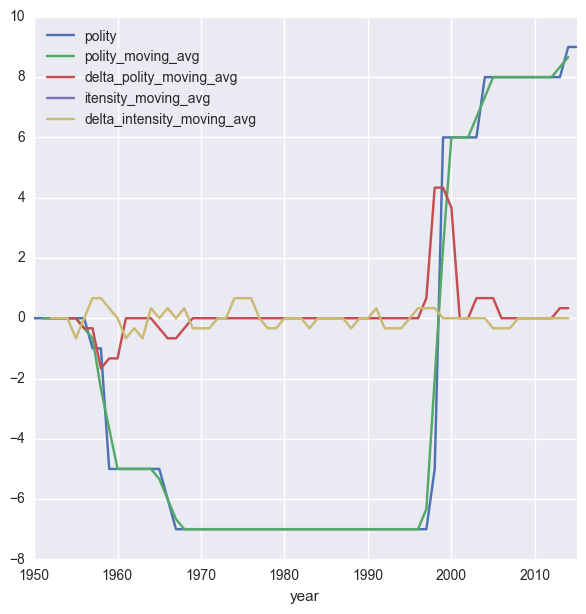

In [901]:
plt.figure(); merged.loc[merged['country']=='Indonesia',['year','polity','polity_moving_avg',\
                                                             'delta_polity_moving_avg','itensity_moving_avg',\
                                                             'delta_intensity_moving_avg']] \
    .plot(x='year',y=['polity','polity_moving_avg','delta_polity_moving_avg',\
                      'itensity_moving_avg','delta_intensity_moving_avg'],figsize=(7,7));

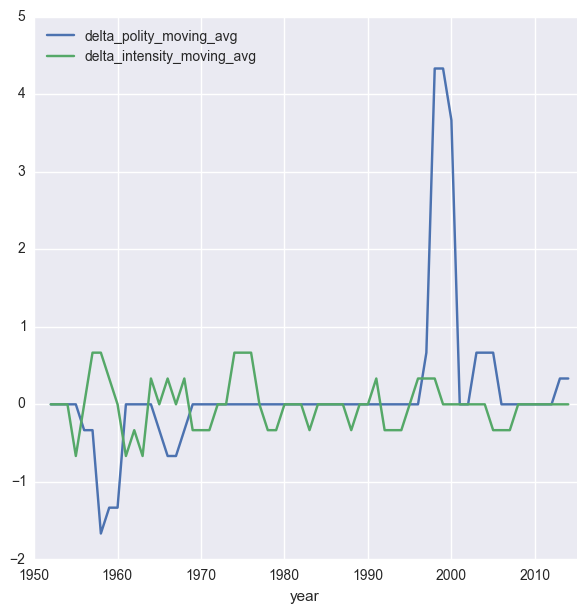

In [902]:
plt.figure(); merged.loc[merged['country']=='Indonesia',['year','delta_polity_moving_avg','delta_intensity_moving_avg']] \
    .plot(x='year',y=['delta_polity_moving_avg','delta_intensity_moving_avg'],figsize=(7,7));

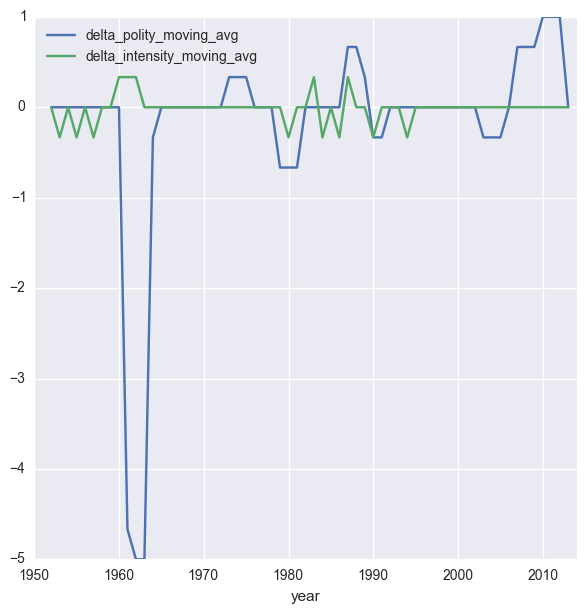

In [903]:
plt.figure(); merged.loc[merged['country']=='Myanmar (Burma)',['year','delta_polity_moving_avg','delta_intensity_moving_avg']] \
    .plot(x='year',y=['delta_polity_moving_avg','delta_intensity_moving_avg'],figsize=(7,7));

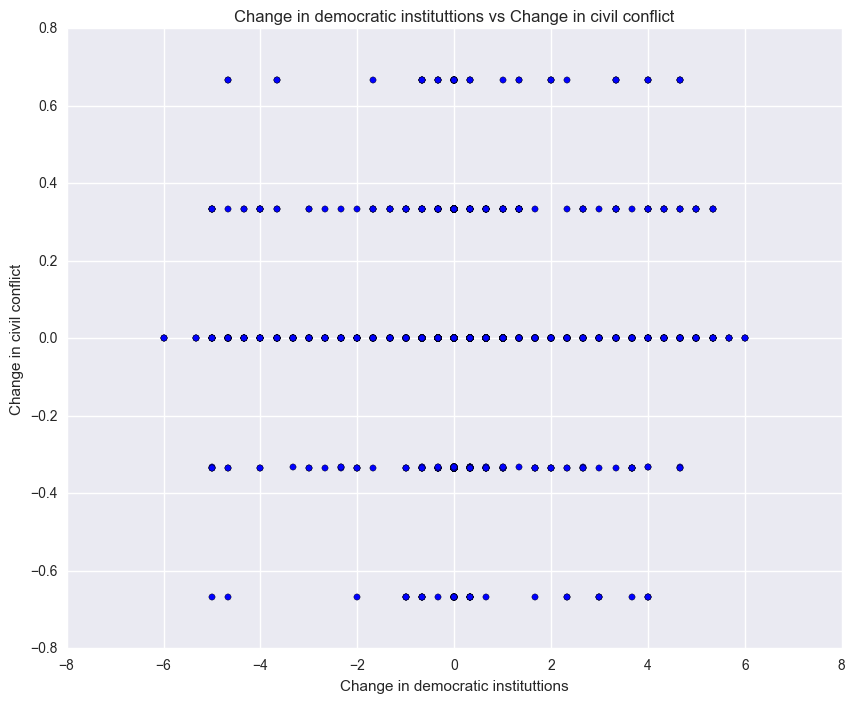

In [904]:
plt.figure(figsize=(10,8))
plt.scatter(merged['delta_polity_moving_avg'],merged['delta_intensity_moving_avg'])

# Chart title
plt.title('Change in democratic instituttions vs Change in civil conflict')

# y label
plt.ylabel('Change in civil conflict')

# x label
plt.xlabel('Change in democratic instituttions')

In [905]:
heatplot_data = merged[['delta_polity_moving_avg','delta_intensity_moving_avg']].fillna(0)
heatplot_data = heatplot_data[(heatplot_data['delta_polity_moving_avg'] != 0) | \
                              (heatplot_data['delta_intensity_moving_avg'] != 0)]
heatplot_data = heatplot_data.round(2)
#sns.heatmap([heatplot_data['delta_polity_moving_avg'],heatplot_data['delta_intensity_moving_avg']], annot=True, fmt='f')


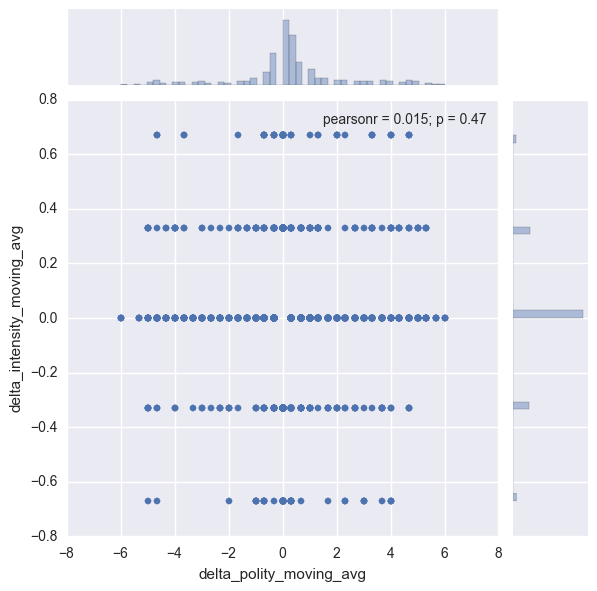

In [906]:
sns.jointplot('delta_polity_moving_avg','delta_intensity_moving_avg',data=heatplot_data)

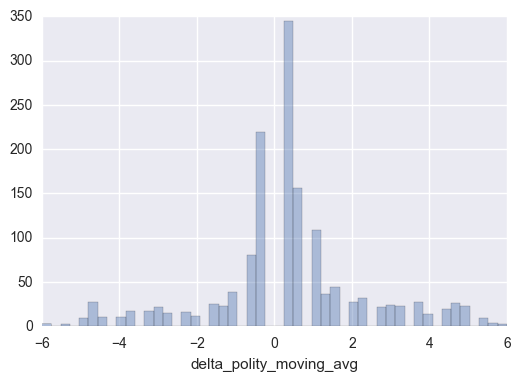

In [907]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(heatplot_data[heatplot_data['delta_intensity_moving_avg']==0]['delta_polity_moving_avg'],kde=False)


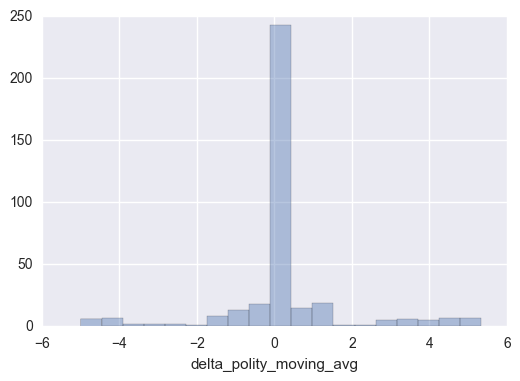

In [908]:
sns.distplot(heatplot_data[(heatplot_data['delta_intensity_moving_avg']>0.2) & \
                          (heatplot_data['delta_intensity_moving_avg']<0.6)]['delta_polity_moving_avg'],kde=False)


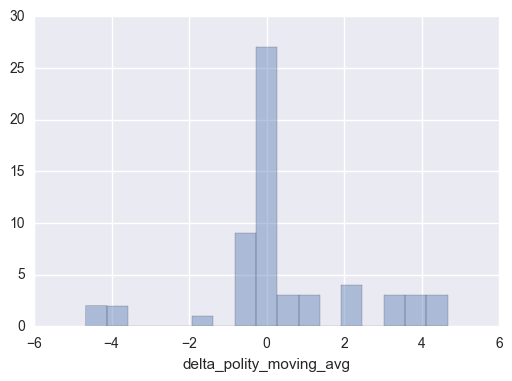

In [909]:
sns.distplot(heatplot_data[(heatplot_data['delta_intensity_moving_avg']>0.6)]['delta_polity_moving_avg'],kde=False)

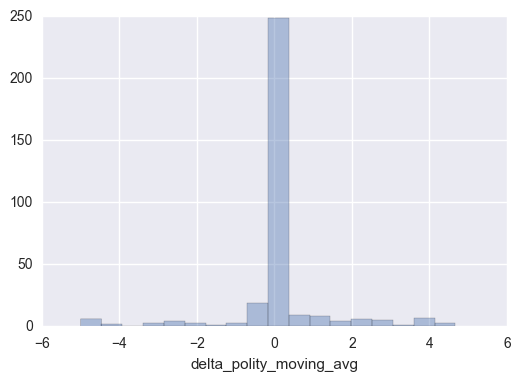

In [910]:
sns.distplot(heatplot_data[(heatplot_data['delta_intensity_moving_avg']<-0.2) & \
                          (heatplot_data['delta_intensity_moving_avg']>-0.6)]['delta_polity_moving_avg'],kde=False)

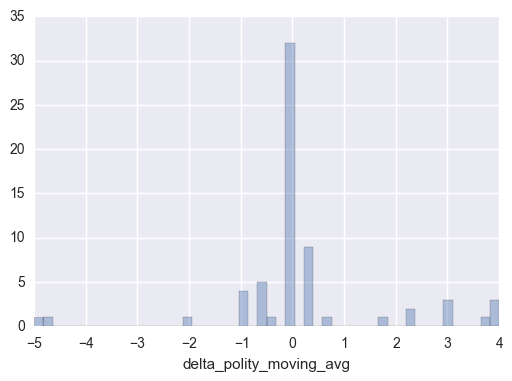

In [911]:
sns.distplot(heatplot_data[(heatplot_data['delta_intensity_moving_avg']<-0.6)]['delta_polity_moving_avg'],kde=False)

### Using battle deaths data

#### First get series of population data for each country from 1950-2015
Source: http://www.un.org/popin/data.html

In [912]:
country_pop = pd.read_csv('country_population_undp.csv')

In [913]:
country_pop = country_pop.drop('Country code',1)

In [914]:
country_pop = country_pop.set_index(['Country','GW_country_code'])

In [915]:
country_pop.head()

1950   1951   1952   1953   1954   1955   1956  \
Country  GW_country_code                                                    
Burundi  516               2309   2359   2404   2446   2488   2532   2578   
Comoros  581                156    160    164    167    170    173    176   
Djibouti 522                 62     63     65     66     68     70     71   
Eritrea  531               1142   1163   1185   1208   1233   1259   1286   
Ethiopia 530              18128  18467  18820  19184  19560  19947  20348   

                           1957   1958   1959  ...     2006   2007   2008  \
Country  GW_country_code                       ...                          
Burundi  516               2628   2680   2733  ...     8218   8515   8822   
Comoros  581                179    183    186  ...      634    649    665   
Djibouti 522                 74     76     80  ...      789    799    810   
Eritrea  531               1315   1344   1375  ...     4304   4406   4501   
Ethiopia 530              20764  21201  21662  ...    78736  80892  83080   

                           2009   2010   2011   2012   2013   2014   2015  
Country  GW_country_code                                                   
Burundi  516               9138   9461   9790  10125  10466  10817  11179  
Comoros  581                682    699    716    734    752    770    788  
Djibouti 522                820    831    842    853    865    876    888  
Eritrea  531               4594   4690   4790   4892   4999   5110   5228  
Ethiopia 530              85302  87562  89859  92191  94558  96959  99391  

[5 rows x 66 columns]

In [916]:
country_pop = country_pop.stack().reset_index()

In [917]:
country_pop.rename(columns={'Country': 'location_pop','GW_country_code': 'gwnoloc',\
                            'level_2': 'year', 0: 'pop'}, inplace=True)

In [918]:
country_pop['year'] = country_pop['year'].astype(int)
country_pop['gwnoloc'] = country_pop['gwnoloc'].astype(str)

In [919]:
country_pop['pop_100k'] = country_pop['pop']/100

In [920]:
country_pop[country_pop['gwnoloc']=='775'].tail()

location_pop gwnoloc  year    pop  pop_100k
5011  Myanmar (Burma)     775  2011  52125    521.25
5012  Myanmar (Burma)     775  2012  52544    525.44
5013  Myanmar (Burma)     775  2013  52984    529.84
5014  Myanmar (Burma)     775  2014  53437    534.37
5015  Myanmar (Burma)     775  2015  53897    538.97

#### Next we import battle deaths data from PRIO for 1950-2008

In [921]:
battle_deaths_PRIO = pd.read_excel('PRIO Battle Deaths Dataset 3.1.xls')

In [922]:
# only keep civil wars (type 3 or 4)

battle_deaths_PRIO = battle_deaths_PRIO[(battle_deaths_PRIO['type'] == 3) | \
                                       (battle_deaths_PRIO['type'] == 4)]

In [923]:
battle_deaths_PRIO = battle_deaths_PRIO[['id','year','bdeadbes','bdeadhig','bdeadlow','location','gwnoloc','region']]

In [924]:

battle_deaths_PRIO['gwnoloc'] = battle_deaths_PRIO['gwnoloc'].astype(str)

In [925]:
# if best guest is not avaialable take average of high and low estimate

battle_deaths_PRIO.loc[battle_deaths_PRIO['bdeadbes'] == -999,'bdeadbes'] = \
    (battle_deaths_PRIO[battle_deaths_PRIO['bdeadbes'] == -999]['bdeadlow'] + \
     battle_deaths_PRIO[battle_deaths_PRIO['bdeadbes'] == -999]['bdeadhig'])/2

In [926]:
battle_deaths_PRIO[battle_deaths_PRIO['gwnoloc'] == '775'].head()

id  year  bdeadbes  bdeadhig  bdeadlow location gwnoloc  region
145  23  1949    2000.0      3000      1000  Myanmar     775       3
146  23  1950    3000.0      5000      1000  Myanmar     775       3
147  23  1951     650.5       999       302  Myanmar     775       3
148  23  1952     650.5       999       302  Myanmar     775       3
149  23  1953     650.5       999       302  Myanmar     775       3

In [927]:
bd_PRIO_Grouped = battle_deaths_PRIO.groupby(['gwnoloc','year','location'],sort=True).sum()

In [928]:
bd_PRIO_Grouped = bd_PRIO_Grouped.reset_index()

In [929]:
bd_PRIO_Grouped.head(20)

gwnoloc  year   location  id  bdeadbes  bdeadhig  bdeadlow  region
0      -99  1947  Hyderabad  19    5499.5      9999      1000       3
1      -99  1948  Hyderabad  19    5499.5      9999      1000       3
2      100  1964   Colombia  92     230.0       230        25       5
3      100  1965   Colombia  92     200.0       200        25       5
4      100  1966   Colombia  92     100.0       100        25       5
5      100  1967   Colombia  92      70.0        70        25       5
6      100  1968   Colombia  92      60.0        60        25       5
7      100  1969   Colombia  92      90.0        90        25       5
8      100  1970   Colombia  92     120.0       120        25       5
9      100  1971   Colombia  92      50.0        50        25       5
10     100  1972   Colombia  92      50.0        50        25       5
11     100  1973   Colombia  92     300.0       300        25       5
12     100  1974   Colombia  92      55.0        55        25       5
13     100  1975   Colombia  92      40.0        40        25       5
14     100  1976   Colombia  92     100.0       100        25       5
15     100  1977   Colombia  92      40.0        40        25       5
16     100  1978   Colombia  92     200.0       200        25       5
17     100  1979   Colombia  92     170.0       170        25       5
18     100  1980   Colombia  92     200.0       200        25       5
19     100  1981   Colombia  92     340.0       340        25       5

In [930]:
# combine with population data

bd_PRIO_Grouped_wPop = pd.merge(bd_PRIO_Grouped, country_pop,  how='right', on=['gwnoloc','year'])
bd_PRIO_Grouped_wPop['bdeadbes'].fillna(0, inplace=True)
bd_PRIO_Grouped_wPop = bd_PRIO_Grouped_wPop.sort_values(['gwnoloc', 'year'], ascending=[True, True])

In [931]:
bd_PRIO_Grouped_wPop['deaths_p100K'] = bd_PRIO_Grouped_wPop['bdeadbes']/bd_PRIO_Grouped_wPop['pop_100k']

In [932]:
bd_PRIO_Grouped_wPop[bd_PRIO_Grouped_wPop['gwnoloc'] == '775']

gwnoloc    year location     id  bdeadbes  bdeadhig  bdeadlow  region  \
892      775  1950.0  Myanmar  132.0    7536.0   12997.0    2075.0    15.0   
893      775  1951.0  Myanmar   98.0    4174.5    6997.0    1352.0    12.0   
894      775  1952.0  Myanmar   98.0    4174.5    6997.0    1352.0    12.0   
895      775  1953.0  Myanmar   98.0    4174.5    6997.0    1352.0    12.0   
896      775  1954.0  Myanmar   98.0    3687.0    6997.0     377.0    12.0   
897      775  1955.0  Myanmar   98.0    3687.0    6997.0     377.0    12.0   
898      775  1956.0  Myanmar   98.0    2186.5    3996.0     377.0    12.0   
899      775  1957.0  Myanmar  154.0    2698.5    4995.0     402.0    15.0   
900      775  1958.0  Myanmar   98.0    2186.5    3996.0     377.0    12.0   
901      775  1959.0  Myanmar  165.0    2698.5    4995.0     402.0    15.0   
902      775  1960.0  Myanmar  165.0    2698.5    4995.0     402.0    15.0   
903      775  1961.0  Myanmar  199.0    5698.5    9995.0    1402.0    18.0   
904      775  1962.0  Myanmar  199.0    5698.5    9995.0    1402.0    18.0   
905      775  1963.0  Myanmar  199.0    5698.5    9995.0    1402.0    18.0   
906      775  1964.0  Myanmar  173.0   10174.0   17996.0    2352.0    15.0   
907      775  1965.0  Myanmar  173.0   10174.0   17996.0    2352.0    15.0   
908      775  1966.0  Myanmar  173.0   10174.0   17996.0    2352.0    15.0   
909      775  1967.0  Myanmar  173.0   10174.0   17996.0    2352.0    15.0   
910      775  1968.0  Myanmar  173.0   15162.0   26996.0    3328.0    15.0   
911      775  1969.0  Myanmar  173.0   15162.0   26996.0    3328.0    15.0   
912      775  1970.0  Myanmar  173.0   15162.0   26996.0    3328.0    15.0   
913      775  1971.0  Myanmar  106.0    9662.5   16997.0    2328.0    12.0   
914      775  1972.0  Myanmar  173.0   10174.5   17996.0    2353.0    15.0   
915      775  1973.0  Myanmar  173.0   10174.5   17996.0    2353.0    15.0   
916      775  1974.0  Myanmar  106.0    9662.5   16997.0    2328.0    12.0   
917      775  1975.0  Myanmar  106.0    9662.5   16997.0    2328.0    12.0   
918      775  1976.0  Myanmar  173.0    7686.5   13995.0    1378.0    15.0   
919      775  1977.0  Myanmar  173.0    7686.5   13995.0    1378.0    15.0   
920      775  1978.0  Myanmar  173.0    7686.5   13995.0    1378.0    15.0   
921      775  1979.0  Myanmar  173.0    2699.0    4995.0     403.0    15.0   
...      ...     ...      ...    ...       ...       ...       ...     ...   
928      775  1986.0  Myanmar  173.0    3250.0    6097.0     403.0    15.0   
929      775  1987.0  Myanmar  173.0    3250.0    6097.0     403.0    15.0   
930      775  1988.0  Myanmar  173.0    6650.5   12898.0     403.0    15.0   
931      775  1989.0  Myanmar   57.0    1113.5    1899.0     328.0     6.0   
932      775  1990.0  Myanmar  107.0    2187.0    5098.0     175.0    12.0   
933      775  1991.0  Myanmar  106.0    2611.5    5098.0     125.0    12.0   
934      775  1992.0  Myanmar  162.0    8098.5   15097.0    1100.0    15.0   
935      775  1993.0  Myanmar   67.0     512.0     999.0      25.0     3.0   
936      775  1994.0  Myanmar  116.0    6523.5   11997.0    1050.0     9.0   
937      775  1995.0  Myanmar   90.0    1024.0    1998.0      50.0     6.0   
938      775  1996.0  Myanmar  149.0    1104.0    2997.0     130.0     9.0   
939      775  1997.0  Myanmar  318.0    1149.0    2198.0     100.0     9.0   
940      775  1998.0  Myanmar   90.0    1024.0    1998.0      50.0     6.0   
941      775  1999.0  Myanmar   90.0    1024.0    1998.0      50.0     6.0   
942      775  2000.0  Myanmar   90.0     662.0    1224.0     100.0     6.0   
943      775  2001.0  Myanmar   90.0    1024.0    1998.0      50.0     6.0   
944      775  2002.0  Myanmar   90.0     230.0     520.0     110.0     6.0   
945      775  2003.0  Myanmar   23.0      31.0      37.0      31.0     3.0   
5455     775  2004.0      NaN    NaN       0.0       NaN       NaN     NaN   
946      775  2005.0  Myanm

In [933]:
all_country_codes = bd_PRIO_Grouped['gwnoloc'].unique()
all_country_codes = all_country_codes.astype(str)

In [934]:
for c in all_country_codes:
    bd_PRIO_Grouped_wPop.loc[bd_PRIO_Grouped_wPop['gwnoloc']==c,'deaths_moving_avg'] = \
        bd_PRIO_Grouped_wPop.loc[bd_PRIO_Grouped_wPop['gwnoloc']==c,'deaths_p100K'].rolling(window=3, center=True).mean()
    bd_PRIO_Grouped_wPop.loc[bd_PRIO_Grouped_wPop['gwnoloc']==c,'delta_deaths_moving_avg'] = \
        bd_PRIO_Grouped_wPop.loc[bd_PRIO_Grouped_wPop['gwnoloc']==c,'deaths_moving_avg'].diff()

In [935]:
bd_PRIO_Grouped_wPop[bd_PRIO_Grouped_wPop['gwnoloc'] == 2]

Empty DataFrame
Columns: [gwnoloc, year, location, id, bdeadbes, bdeadhig, bdeadlow, region, location_pop, pop, pop_100k, deaths_p100K, deaths_moving_avg, delta_deaths_moving_avg]
Index: []

#### Next we import battle deaths data from UCDP for 2008-2015

In [936]:
battle_deaths_UCDP = pd.read_csv('ucdp-brd-conf-50-2016.csv')

In [937]:
# only keep civil wars (type 3 or 4)

battle_deaths_UCDP = battle_deaths_UCDP[(battle_deaths_UCDP['TypeOfConflict'] == '3') | \
                                       (battle_deaths_UCDP['TypeOfConflict'] == '4')]

In [938]:
battle_deaths_UCDP = battle_deaths_UCDP[['ConflictID','Year','LocationInc',\
                                         'BdBest','BdLow','BdHigh','GWNoLoc','Region']]

#[['id','year','bdeadbes','bdeadhig','bdeadlow','location','gwnoloc','region']]

In [939]:
battle_deaths_UCDP.rename(columns={'ConflictID': 'id','Year': 'year',\
                            'LocationInc': 'location','BdBest': 'bdeadbes',\
                           'BdLow': 'bdeadlow','BdHigh': 'bdeadhig',\
                           'GWNoLoc': 'gwnoloc','Region': 'region'}, inplace=True)

In [940]:
battle_deaths_UCDP['gwnoloc'] = battle_deaths_UCDP['gwnoloc'].astype(str)

In [941]:
battle_deaths_UCDP.head()

id  year     location  bdeadbes  bdeadlow  bdeadhig gwnoloc region
0   6  1993         Iran       110       110       110     630      2
1   6  1996         Iran        27        27        29     630      2
2   6  1990         Iran        31        31       335     630      2
3  10  1989  Philippines       822       801       885     840      3
4  10  1990  Philippines      1165      1165      1174     840      3

In [942]:
bd_UCDP_Grouped = battle_deaths_UCDP.groupby(['gwnoloc','year','location','region'],sort=True).sum()

In [943]:
bd_UCDP_Grouped = bd_UCDP_Grouped.reset_index()

In [944]:
bd_UCDP_Grouped.head()

gwnoloc  year  location region  id  bdeadbes  bdeadlow  bdeadhig
0     100  1989  Colombia      5  92       236       236       254
1     100  1990  Colombia      5  92       474       474       541
2     100  1991  Colombia      5  92       725       725       754
3     100  1992  Colombia      5  92       758       758       782
4     100  1993  Colombia      5  92       195       195       205

In [945]:
bd_UCDP_Grouped_wPop = pd.merge(bd_UCDP_Grouped, country_pop,  how='right', on=['gwnoloc','year'])
bd_UCDP_Grouped_wPop['bdeadbes'].fillna(0, inplace=True)
bd_UCDP_Grouped_wPop = bd_UCDP_Grouped_wPop.sort_values(['gwnoloc', 'year'], ascending=[True, True])


In [946]:
bd_UCDP_Grouped_wPop['deaths_p100K'] = bd_UCDP_Grouped_wPop['bdeadbes']/bd_UCDP_Grouped_wPop['pop_100k']

In [947]:
bd_UCDP_Grouped_wPop.head()

gwnoloc    year location region  id  bdeadbes  bdeadlow  bdeadhig  \
10228     100  1950.0      NaN    NaN NaN       0.0       NaN       NaN   
10229     100  1951.0      NaN    NaN NaN       0.0       NaN       NaN   
10230     100  1952.0      NaN    NaN NaN       0.0       NaN       NaN   
10231     100  1953.0      NaN    NaN NaN       0.0       NaN       NaN   
10232     100  1954.0      NaN    NaN NaN       0.0       NaN       NaN   

      location_pop    pop  pop_100k  deaths_p100K  
10228     Colombia  12341    123.41           0.0  
10229     Colombia  12700    127.00           0.0  
10230     Colombia  13065    130.65           0.0  
10231     Colombia  13439    134.39           0.0  
10232     Colombia  13825    138.25           0.0

In [948]:
all_country_codes = bd_UCDP_Grouped_wPop['gwnoloc'].unique()
all_country_codes = all_country_codes.astype(str)

In [949]:
for c in all_country_codes:
    bd_UCDP_Grouped_wPop.loc[bd_UCDP_Grouped_wPop['gwnoloc']==c,'deaths_moving_avg'] = \
        bd_UCDP_Grouped_wPop.loc[bd_UCDP_Grouped_wPop['gwnoloc']==c,'deaths_p100K'].rolling(window=3, center=True).mean()
    bd_UCDP_Grouped_wPop.loc[bd_UCDP_Grouped_wPop['gwnoloc']==c,'delta_deaths_moving_avg'] = \
        bd_UCDP_Grouped_wPop.loc[bd_UCDP_Grouped_wPop['gwnoloc']==c,'deaths_moving_avg'].diff()

#### Merge the UCDP and PRIO datasets

In [950]:
deaths = bd_PRIO_Grouped_wPop[bd_PRIO_Grouped_wPop['year']<2009].append(bd_UCDP_Grouped_wPop[bd_UCDP_Grouped_wPop['year']>=2009])

In [951]:
deaths.rename(columns={'gwnoloc': 'ccode'}, inplace=True)

In [952]:
deaths.head()

bdeadbes  bdeadhig  bdeadlow  deaths_moving_avg  deaths_p100K  \
10247       0.0       NaN       NaN                NaN           0.0   
10248       0.0       NaN       NaN                0.0           0.0   
10249       0.0       NaN       NaN                0.0           0.0   
10250       0.0       NaN       NaN                0.0           0.0   
10251       0.0       NaN       NaN                0.0           0.0   

       delta_deaths_moving_avg ccode  id location location_pop    pop  \
10247                      NaN   100 NaN      NaN     Colombia  12341   
10248                      NaN   100 NaN      NaN     Colombia  12700   
10249                      0.0   100 NaN      NaN     Colombia  13065   
10250                      0.0   100 NaN      NaN     Colombia  13439   
10251                      0.0   100 NaN      NaN     Colombia  13825   

       pop_100k region    year  
10247    123.41    NaN  1950.0  
10248    127.00    NaN  1951.0  
10249    130.65    NaN  1952.0  
10250    134.39    NaN  1953.0  
10251    138.25    NaN  1954.0

### Merge deaths and polity

In [953]:
merged_dp = pd.merge(polityIV, deaths,  how='left', on=['ccode','year'])

In [954]:
merged_dp.loc[merged_dp['country'] == 'Myanmar (Burma)',\
              ['year','polity_moving_avg','delta_polity_moving_avg','deaths_moving_avg','delta_deaths_moving_avg']]

year  polity_moving_avg  delta_polity_moving_avg  deaths_moving_avg  \
5146  1950                NaN                      NaN                NaN   
5147  1951           8.000000                      NaN          29.780865   
5148  1952           8.000000                 0.000000          22.958541   
5149  1953           8.000000                 0.000000          21.667389   
5150  1954           8.000000                 0.000000          20.388036   
5151  1955           8.000000                 0.000000          16.579727   
5152  1956           8.000000                 0.000000          14.546481   
5153  1957           8.000000                 0.000000          11.717225   
5154  1958           8.000000                 0.000000          12.295146   
5155  1959           8.000000                 0.000000          12.010473   
5156  1960           8.000000                 0.000000          17.114939   
5157  1961           3.333333                -4.666667          21.297632   
5158  1962          -1.666667                -5.000000          25.388956   
5159  1963          -6.666667                -5.000000          31.188962   
5160  1964          -7.000000                -0.333333          36.843246   
5161  1965          -7.000000                 0.000000          42.347462   
5162  1966          -7.000000                 0.000000          41.346491   
5163  1967          -7.000000                 0.000000          46.779041   
5164  1968          -7.000000                 0.000000          52.065875   
5165  1969          -7.000000                 0.000000          57.221946   
5166  1970          -7.000000                 0.000000          49.243289   
5167  1971          -7.000000                 0.000000          42.067376   
5168  1972          -7.000000                 0.000000          35.073988   
5169  1973          -6.666667                 0.333333          34.269552   
5170  1974          -6.333333                 0.333333          32.888162   
5171  1975          -6.000000                 0.333333          29.442639   
5172  1976          -6.000000                 0.000000          26.650869   
5173  1977          -6.000000                 0.000000          23.928042   
5174  1978          -6.000000                 0.000000          18.434351   
5175  1979          -6.666667                -0.666667          13.070148   
...    ...                ...                      ...                ...   
5181  1985          -8.000000                 0.000000           8.443604   
5182  1986          -8.000000                 0.000000           8.279939   
5183  1987          -7.333333                 0.666667          10.912038   
5184  1988          -6.666667                 0.666667           9.050259   
5185  1989          -6.333333                 0.333333           8.077689   
5186  1990          -6.666667                -0.333333           4.676399   
5187  1991          -7.000000                -0.333333          10.038993   
5188  1992          -7.000000                 0.000000           8.694629   
5189  1993          -7.000000                 0.000000          11.574319   
5190  1994          -7.000000                 0.000000           6.078175   
5191  1995          -7.000000                 0.000000           6.499638   
5192  1996          -7.000000                 0.000000           2.410440   
5193  1997          -7.000000                 0.000000           2.380911   
5194  1998          -7.000000                 0.000000           2.292979   
5195  1999          -7.000000                 0.000000           1.921389   
5196  2000          -7.000000                 0.000000           1.895715   
5197  2001          -7.000000                 0.000000           1.328583   
5198  2002          -7.000000                 0.000000           0.886701   
5199  2003          -7.333333                -0.333333           0.178482   
5200  2004          -7.666667                -0.333333           0.409140   
52

In [955]:
heatplot_data = merged_dp.loc[(merged_dp['delta_deaths_moving_avg'] > -50) & (merged_dp['delta_deaths_moving_avg'] < 50),\
                              ['delta_polity_moving_avg','delta_deaths_moving_avg']].fillna(0)
heatplot_data = heatplot_data[(heatplot_data['delta_deaths_moving_avg'] != 0) | \
                              (heatplot_data['delta_polity_moving_avg'] != 0)]

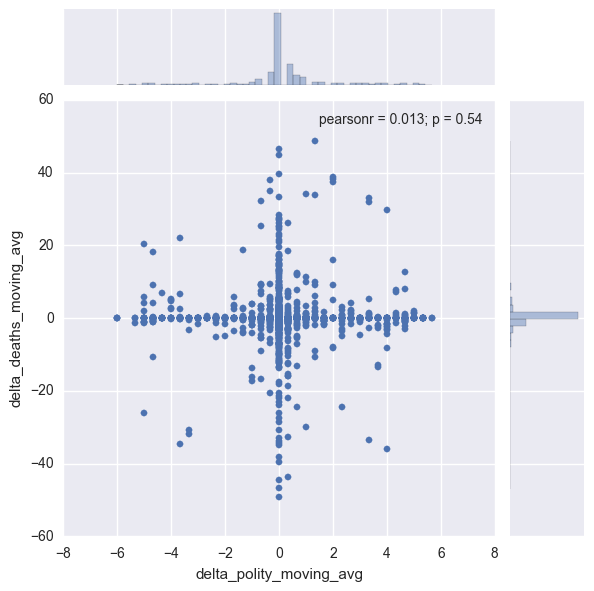

In [956]:
sns.jointplot('delta_polity_moving_avg','delta_deaths_moving_avg',data=heatplot_data)

Afghanistan
Algeria
Angola
Argentina
Azerbaijan
Bahrain
Burkina Faso
Bhutan
Bangladesh
Bolivia
Burundi
Cambodia
Cameroon
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo Brazzaville
Croatia
Cuba
Djibouti
Dominican Republic
Egypt
Equatorial Guinea
Eritrea
Ethiopia
East Timor
Fiji
France
Gabon
Gambia
Ghana
Guinea-Bissau
Greece
Georgia
Guatemala
Guinea
Guyana
Haiti
India
Indonesia
Iran
Iraq
Israel
Ivory Coast
Kenya
Kyrgyzstan
Laos
Liberia
Lebanon
Lesotho
Libya
Mauritania
Madagascar
Malaysia
Mexico
Moldova
Mali
Morocco
Myanmar (Burma)
Mozambique
Nepal
Nicaragua
Nigeria
Niger
Oman
Pakistan
Panama
Paraguay
Peru
Philippines
Papua New Guinea
Romania
Russia
Rwanda
South Africa
El Salvador
Saudi Arabia
Sudan-North
Senegal
Sierra Leone
Somalia
Spain
Sri Lanka
Sudan
Syria
Tajikistan
Tanzania
Thailand
Turkmenistan
Togo
Trinidad and Tobago
Tunisia
Turkey
Uganda
United Kingdom
Ukraine
Uruguay
United States
Uzbekistan
Yemen North
Congo Kinshasa
Zambia
Zimbabwe


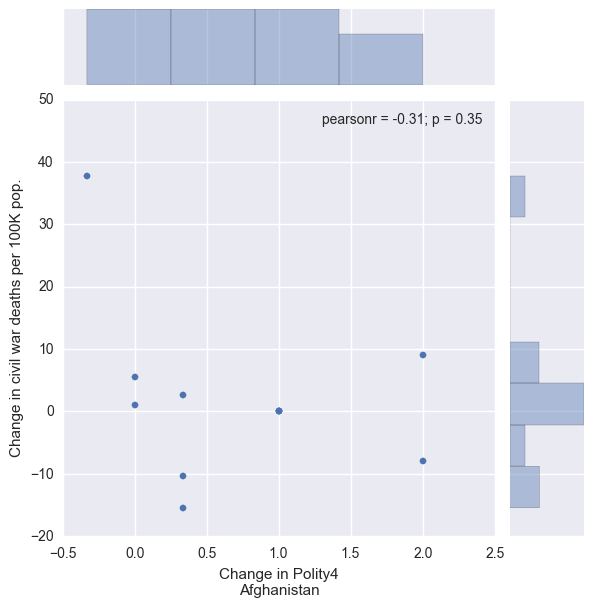

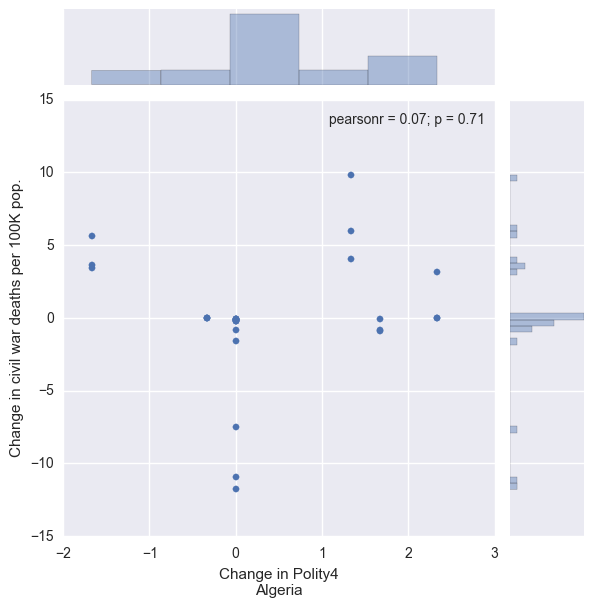

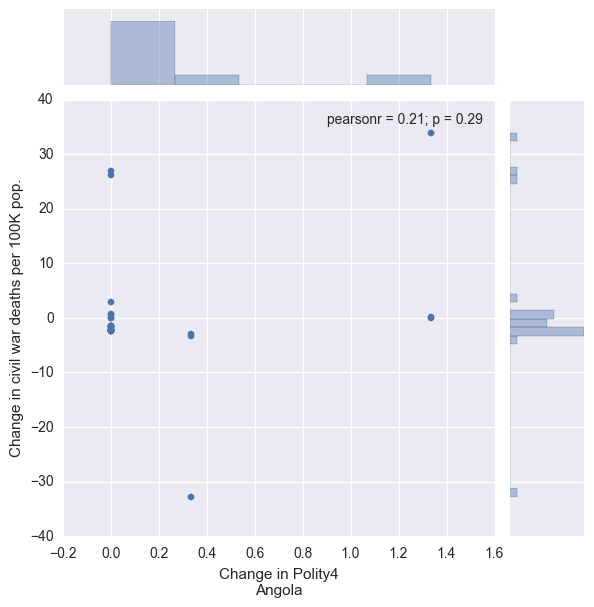

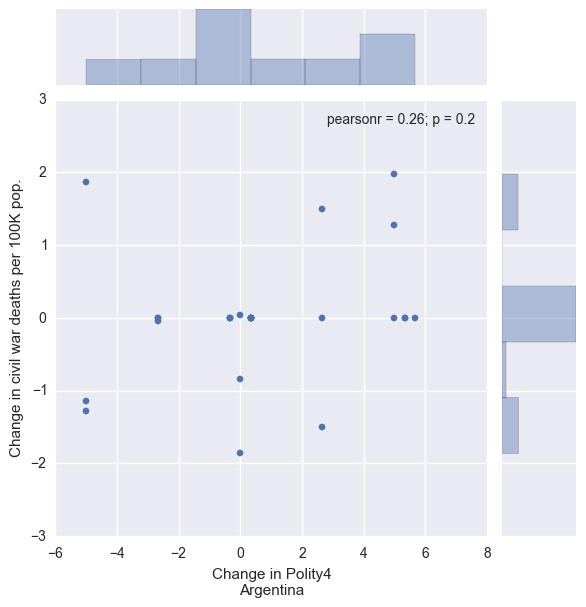

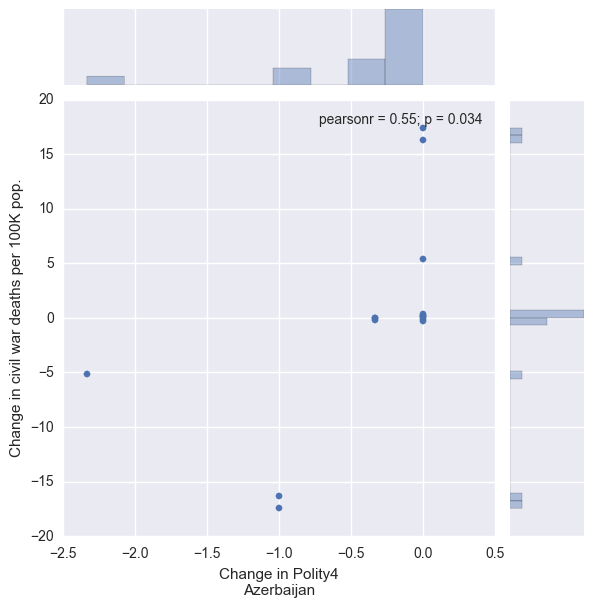

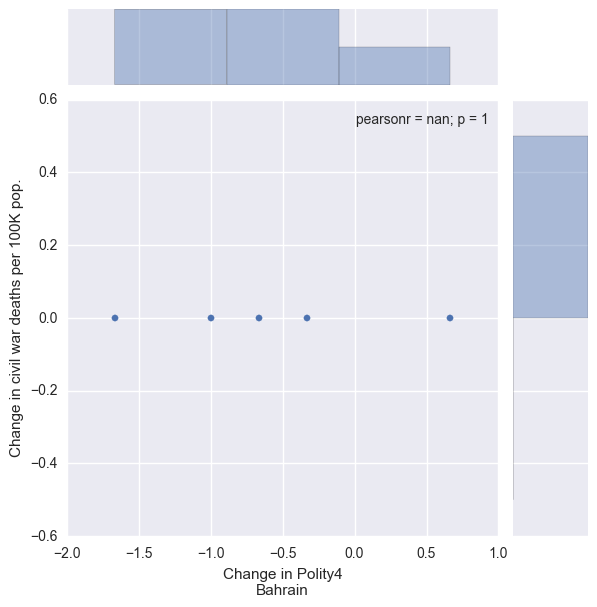

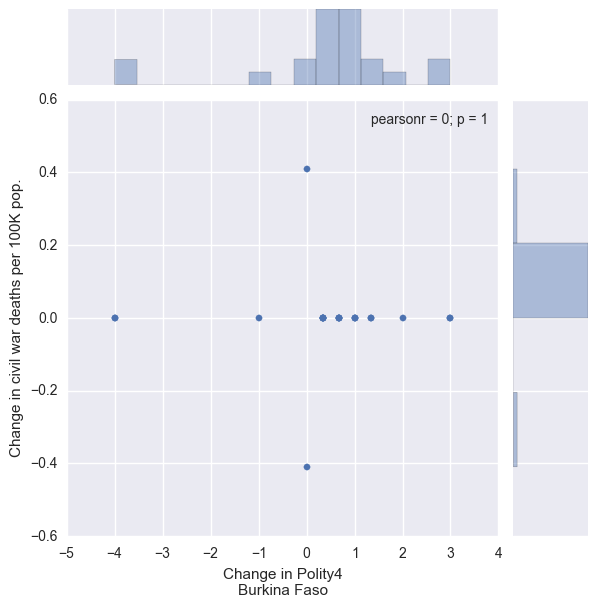

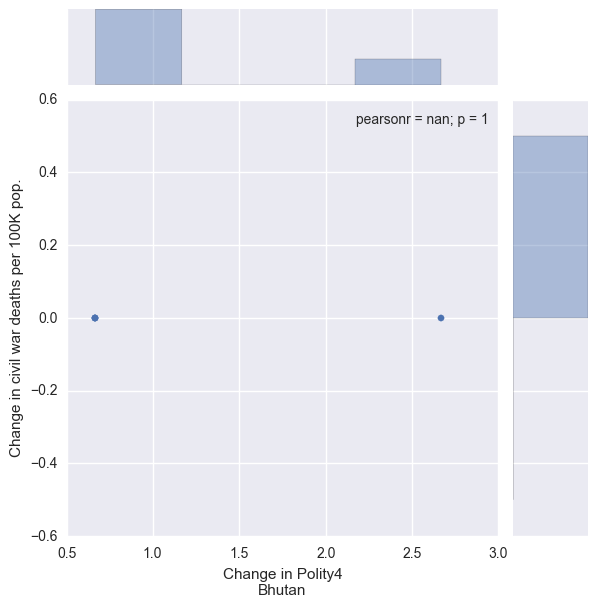

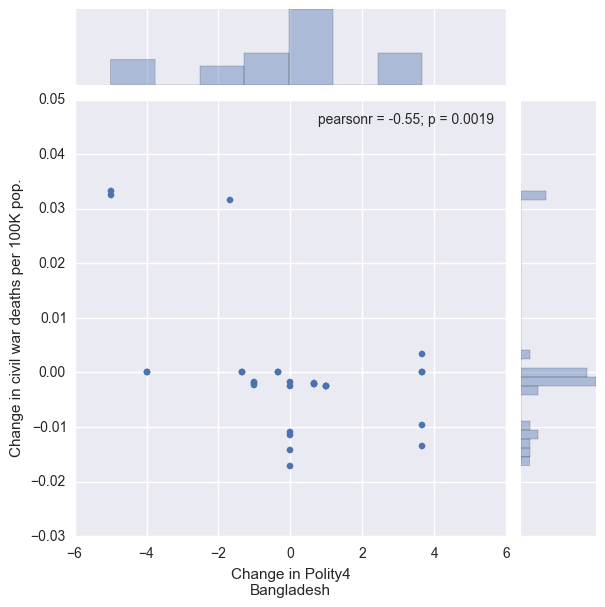

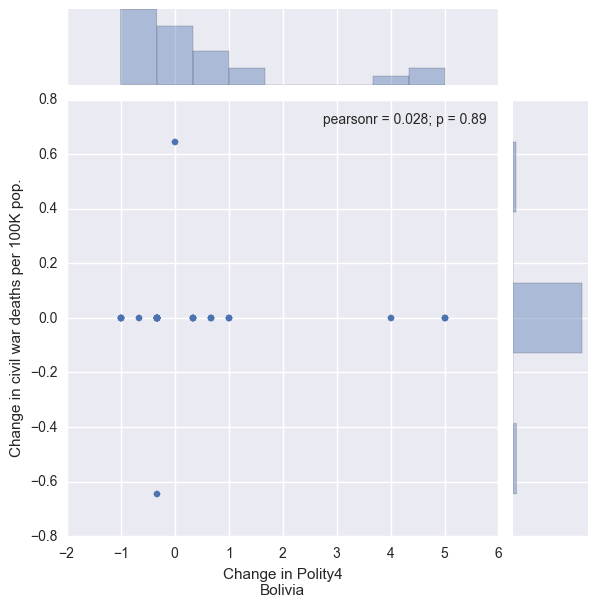

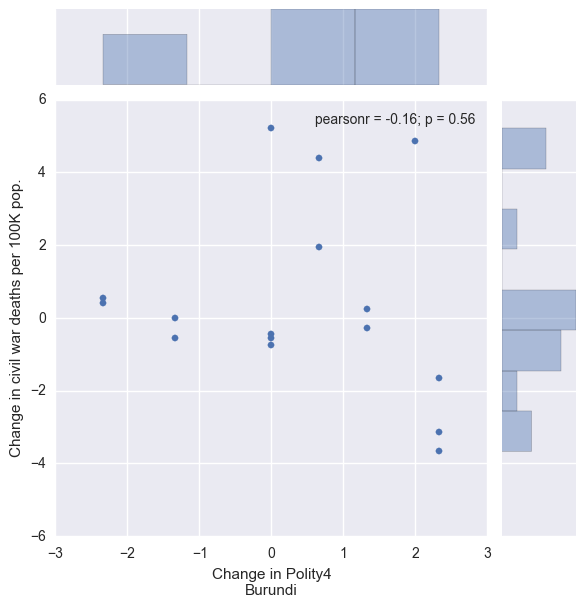

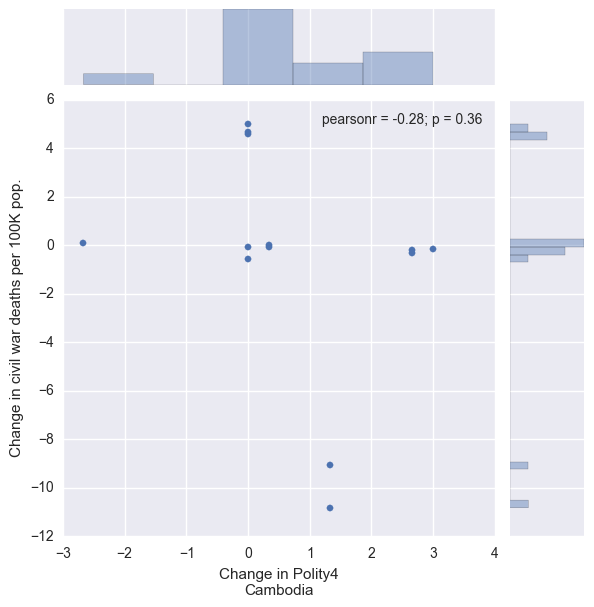

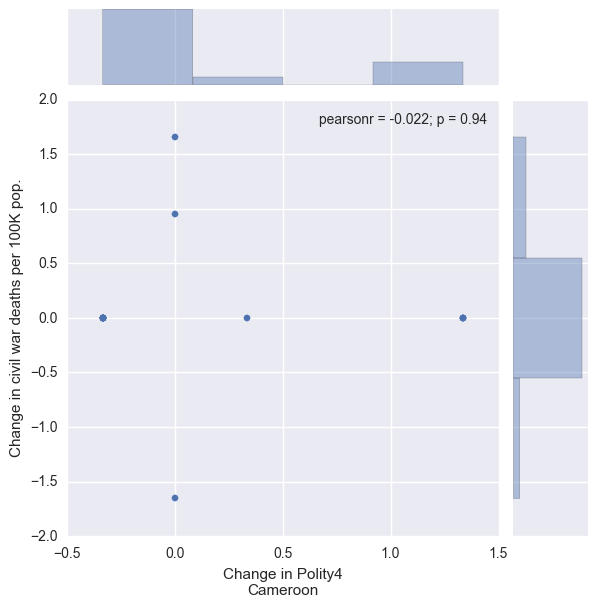

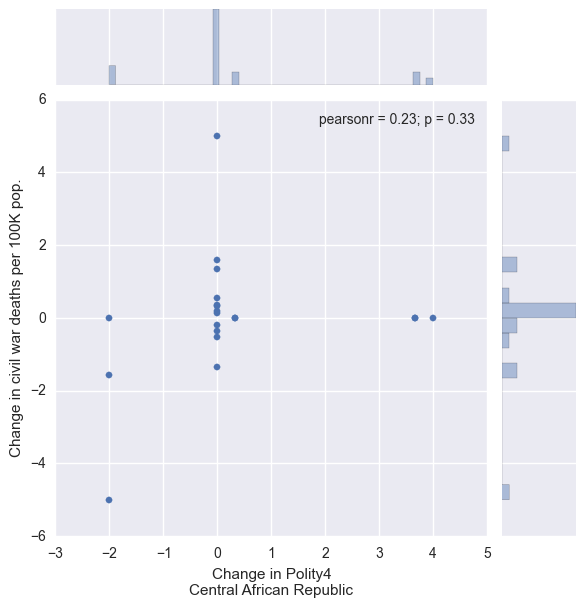

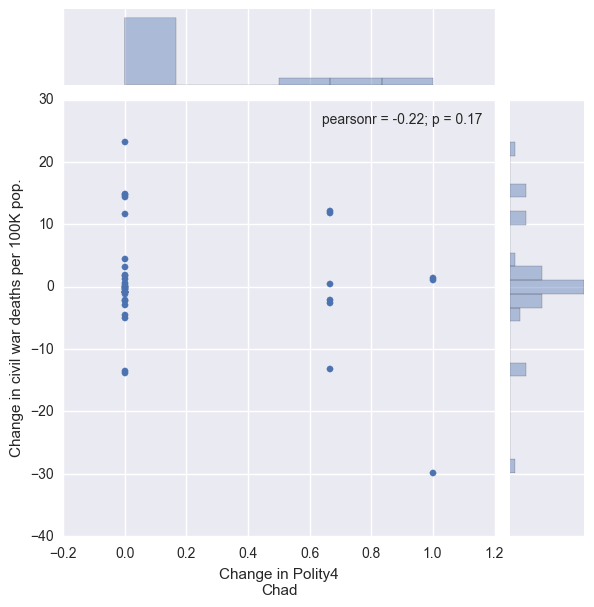

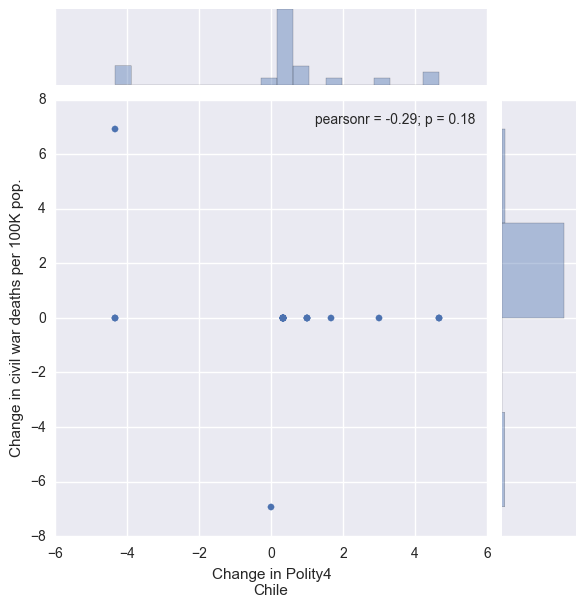

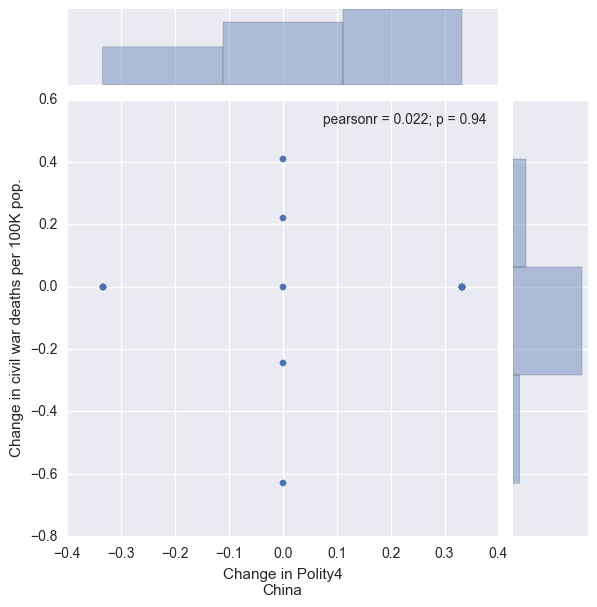

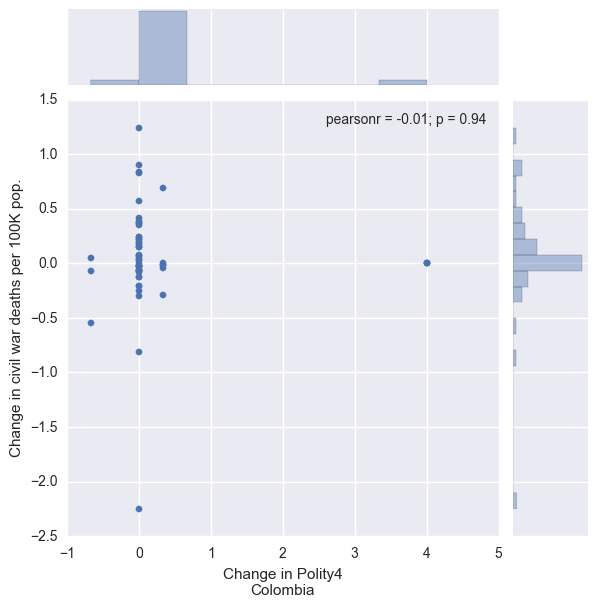

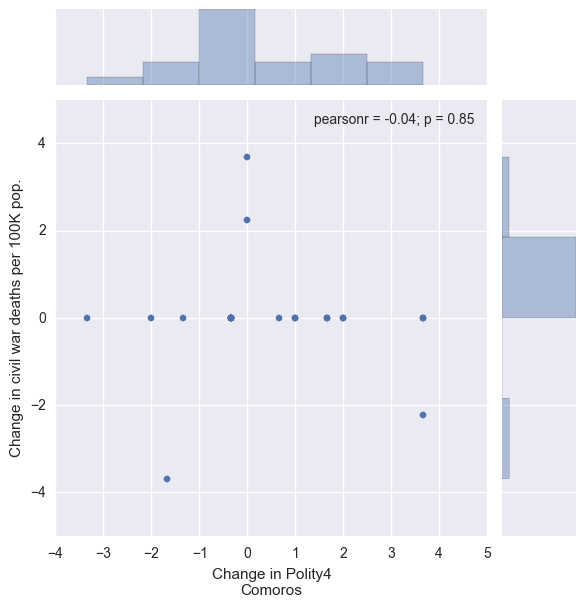

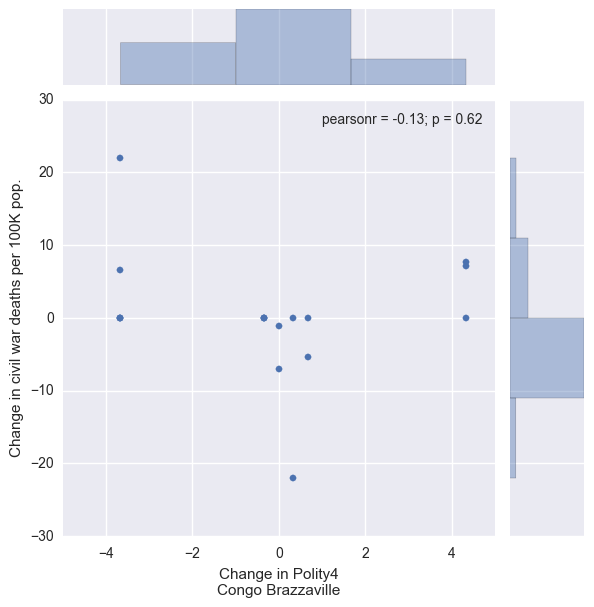

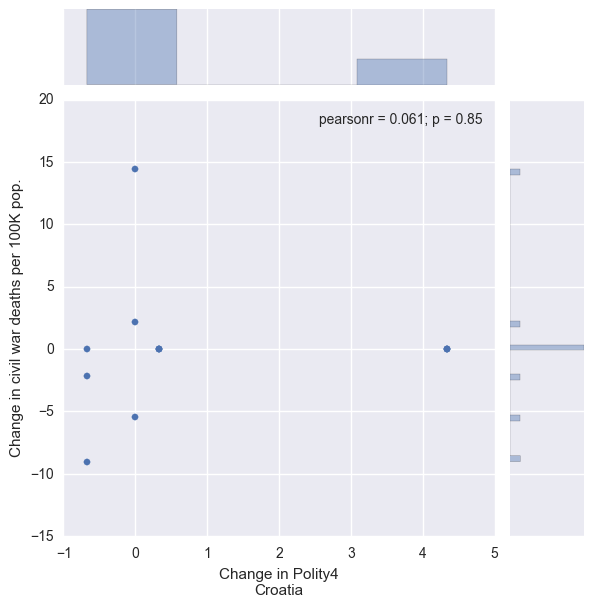

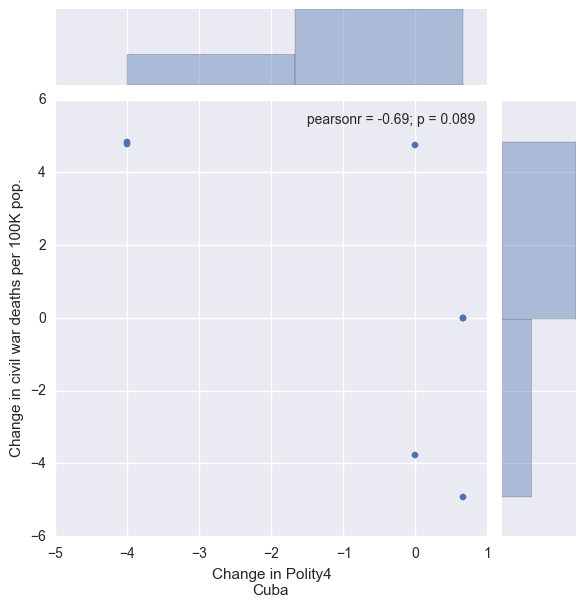

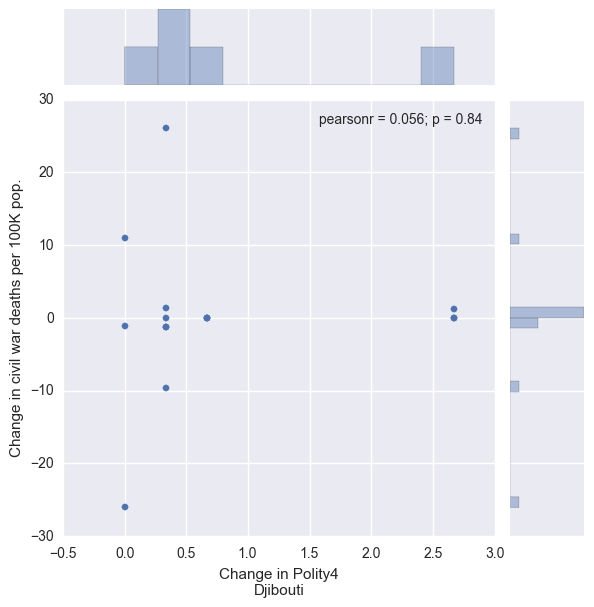

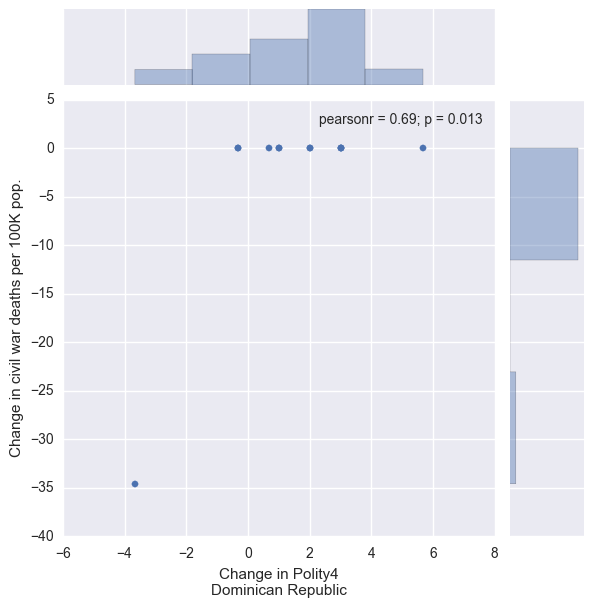

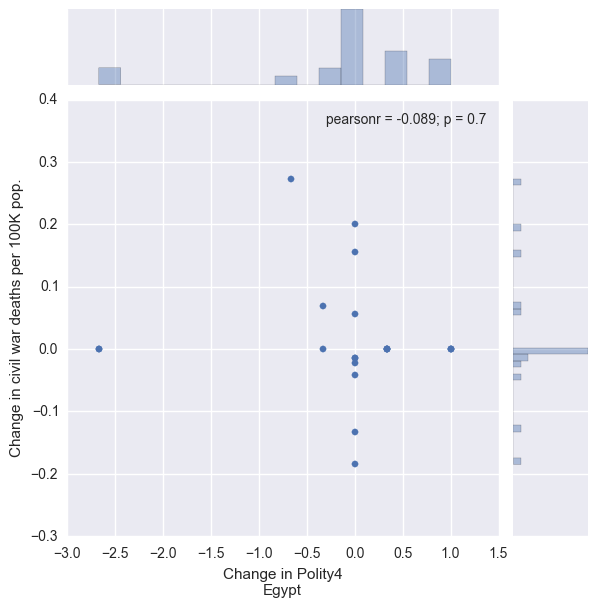

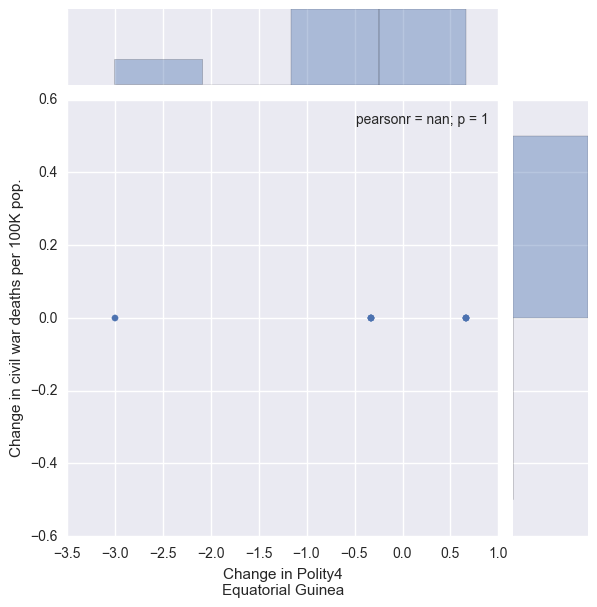

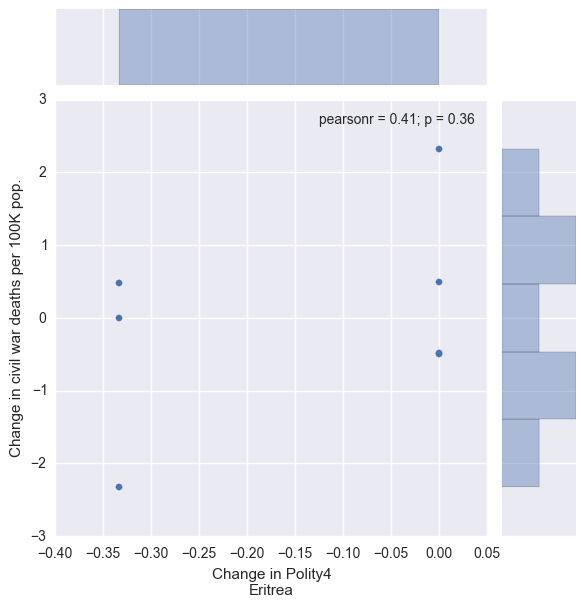

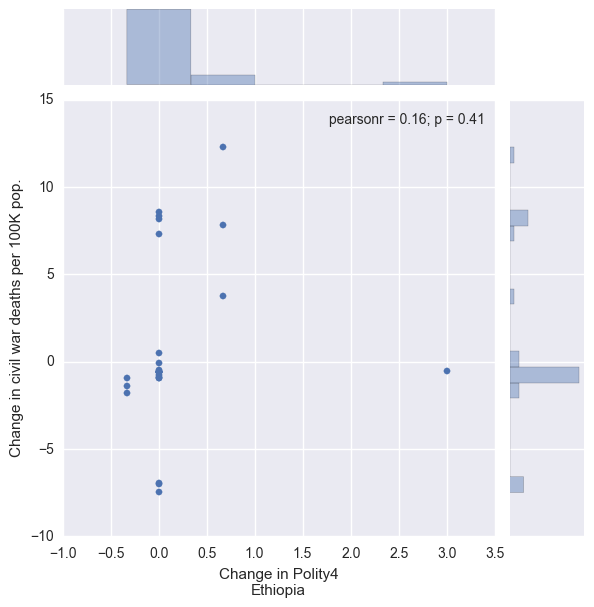

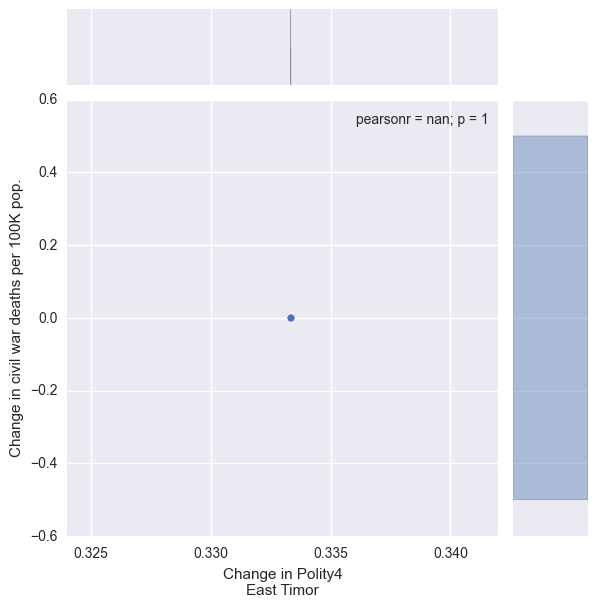

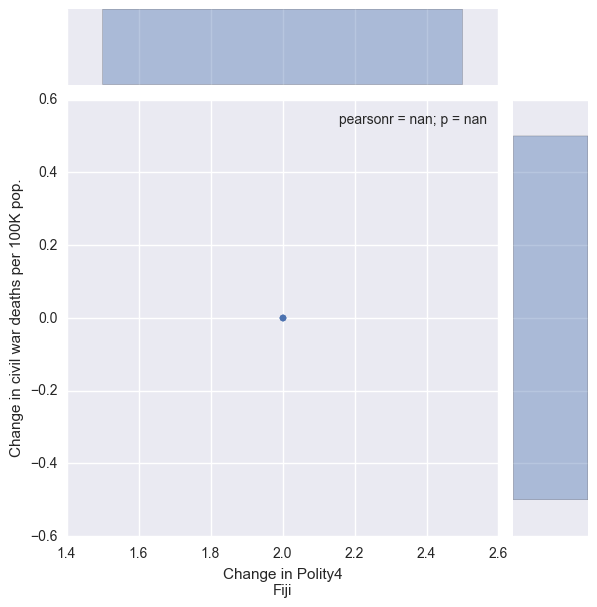

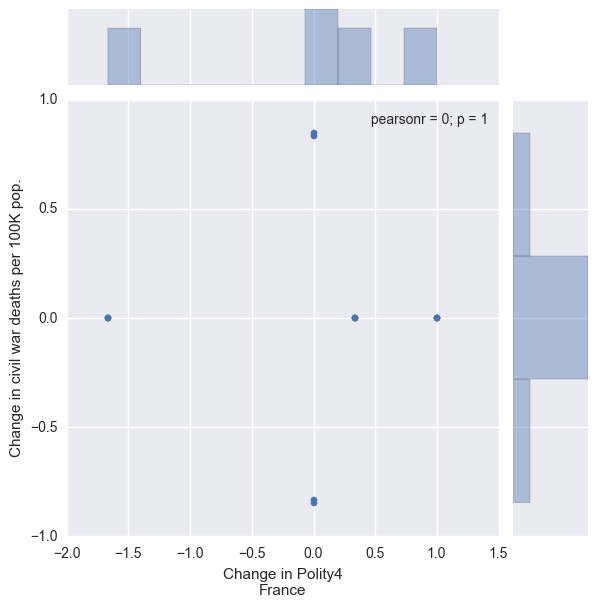

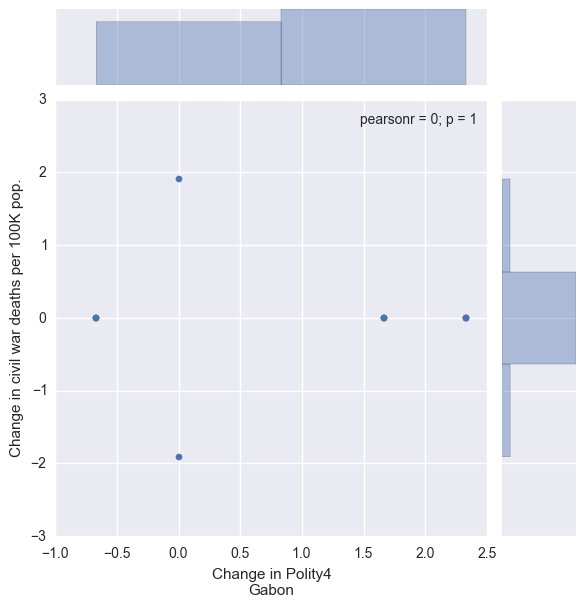

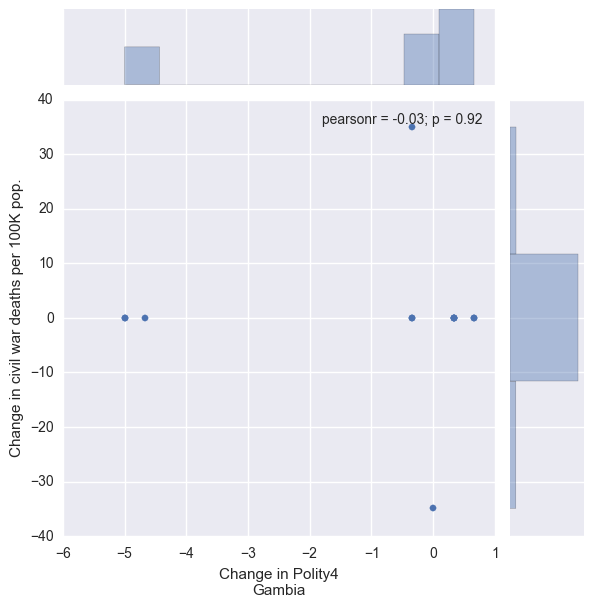

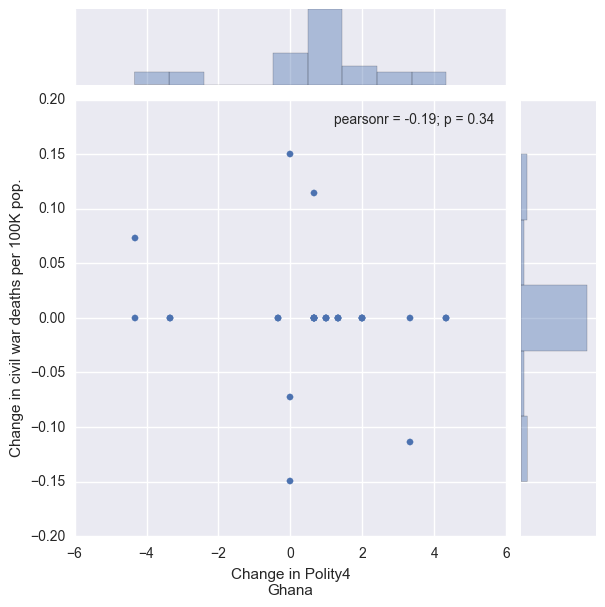

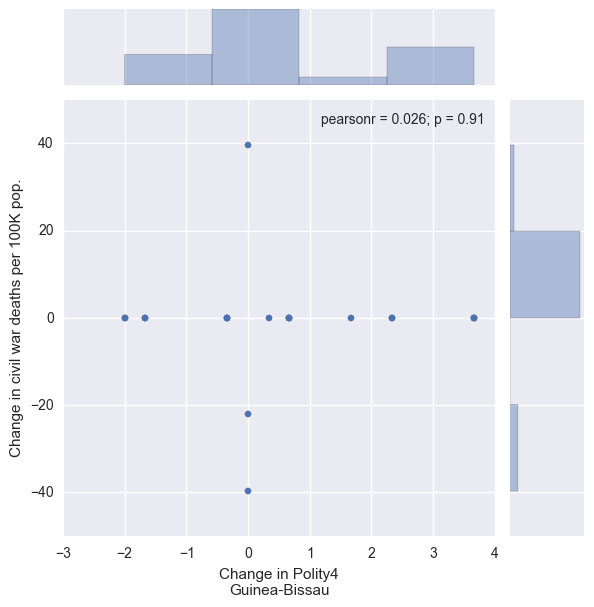

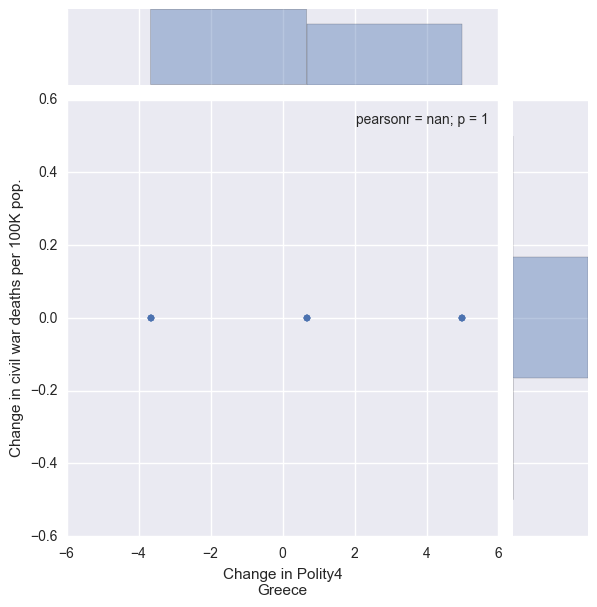

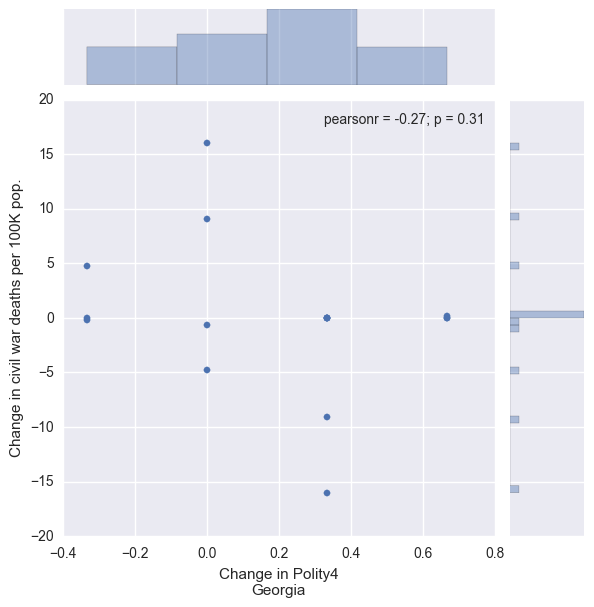

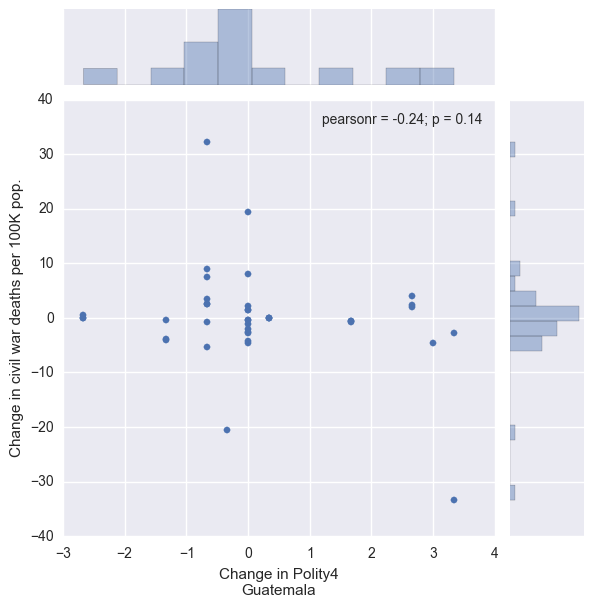

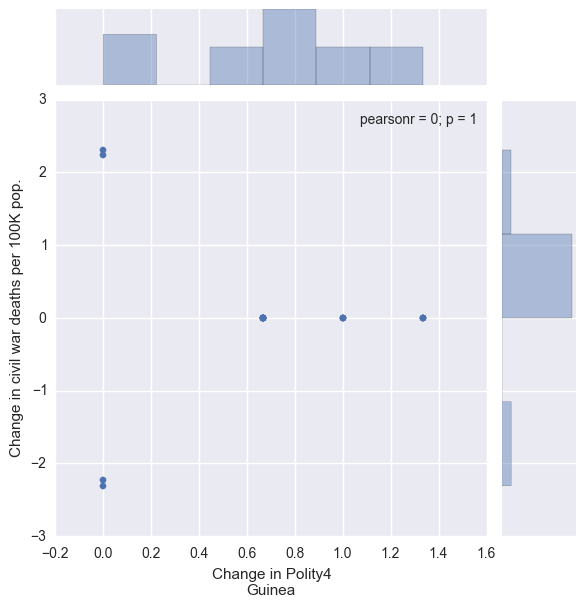

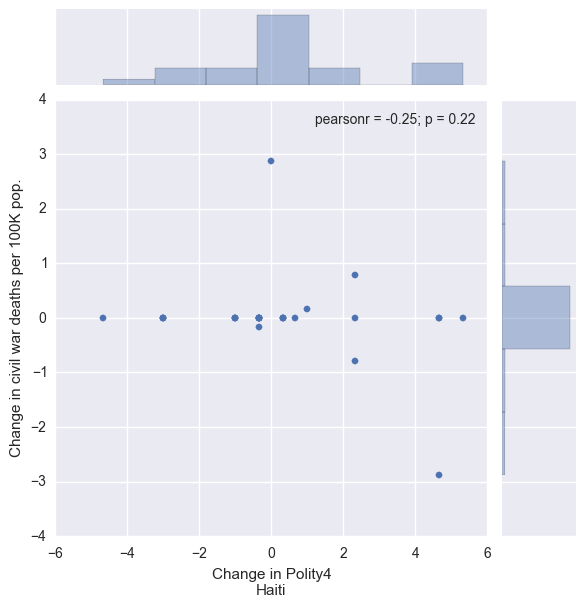

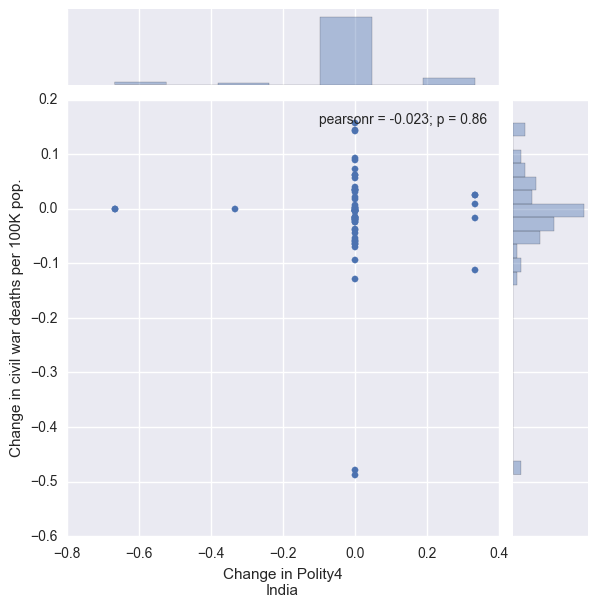

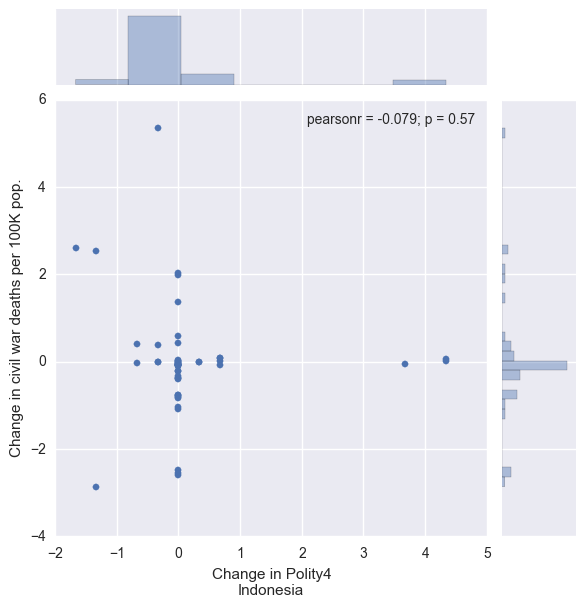

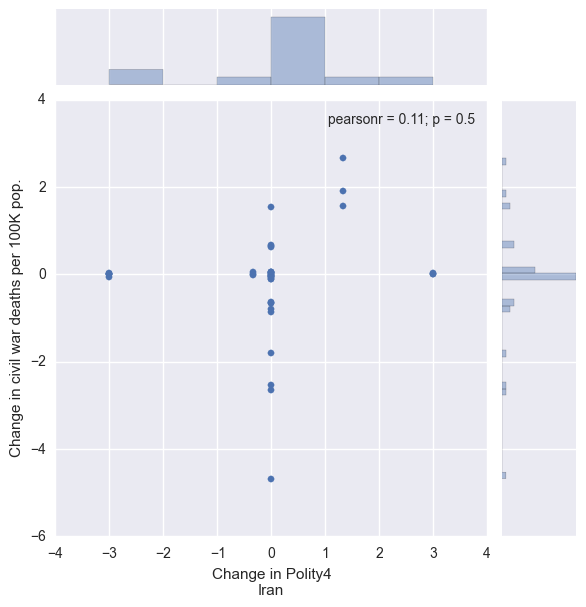

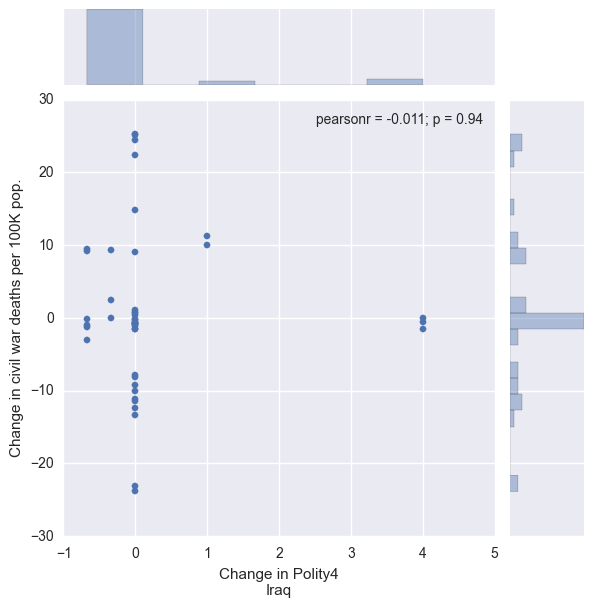

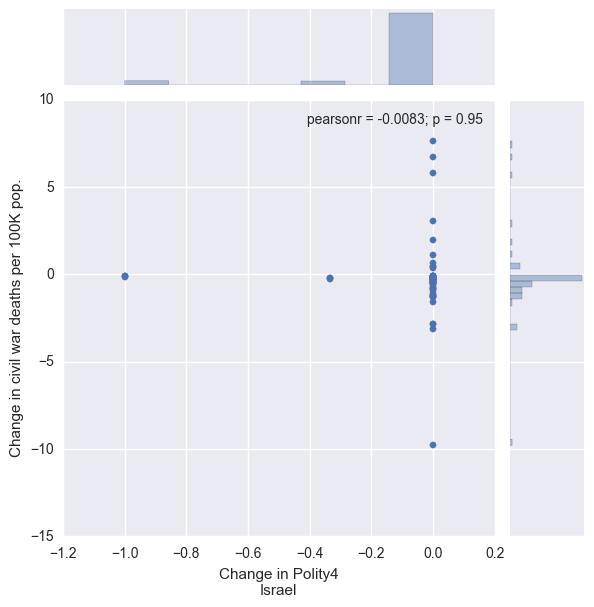

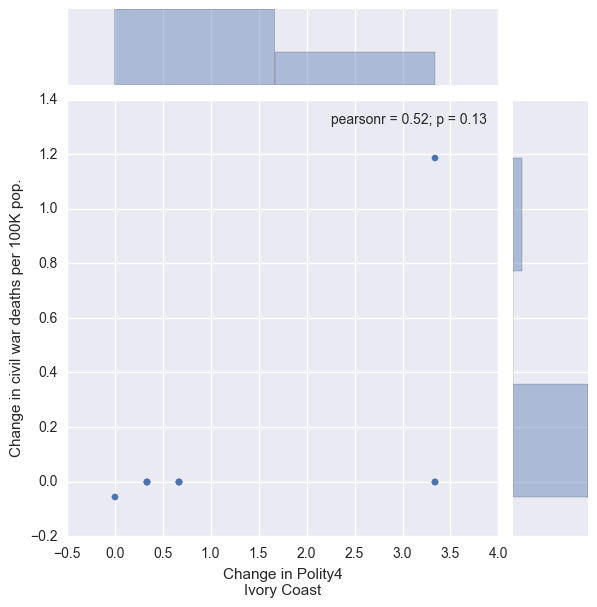

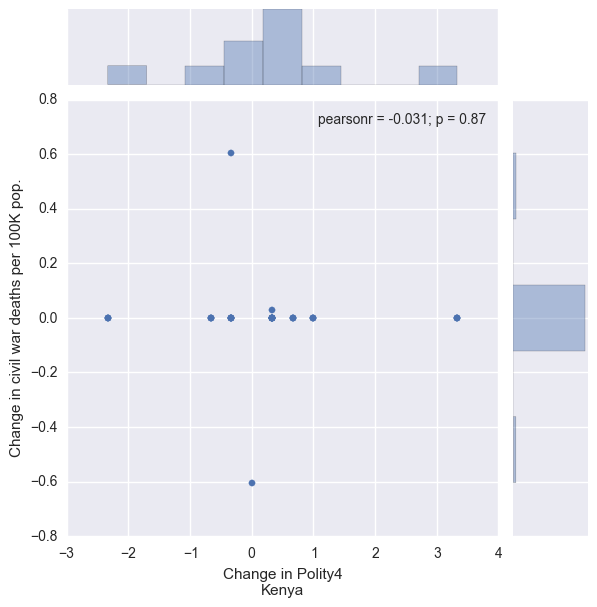

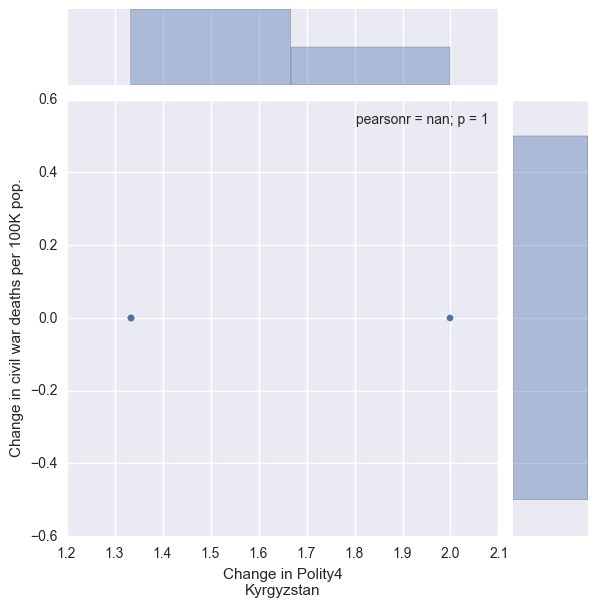

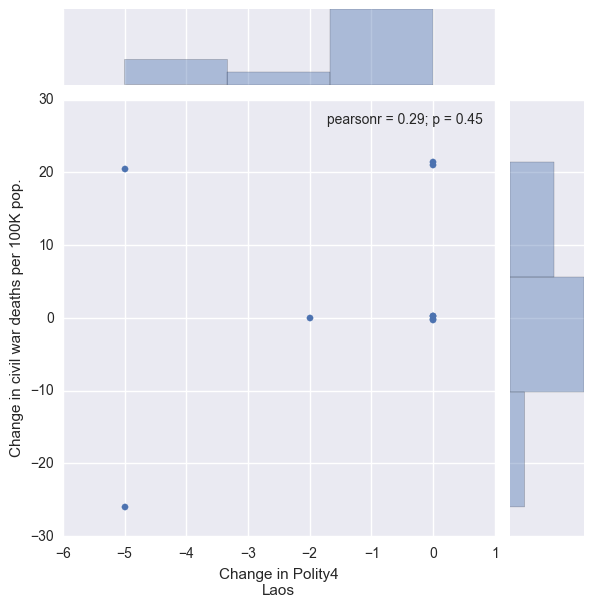

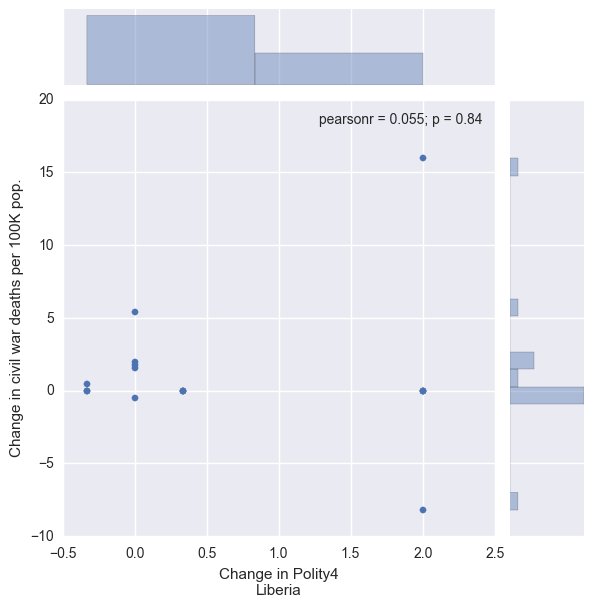

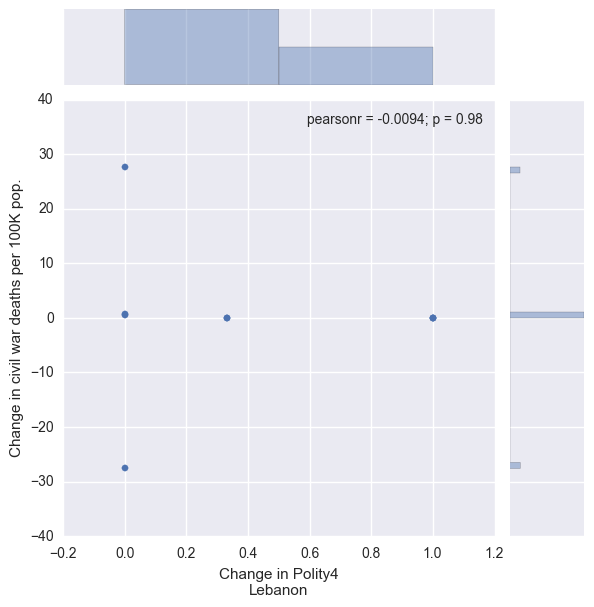

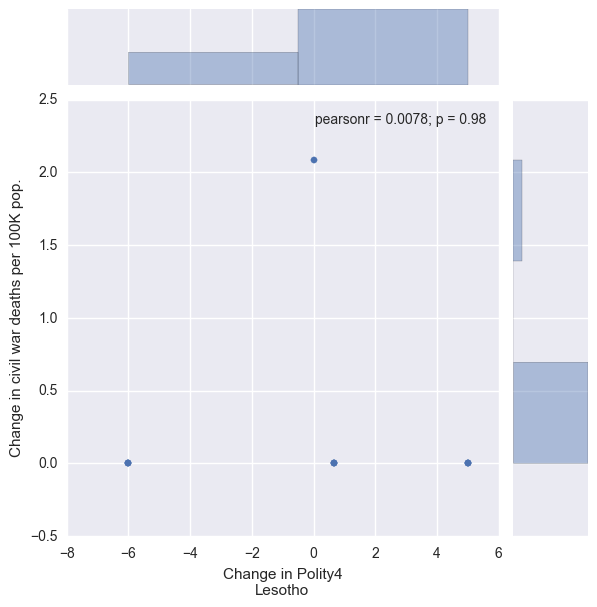

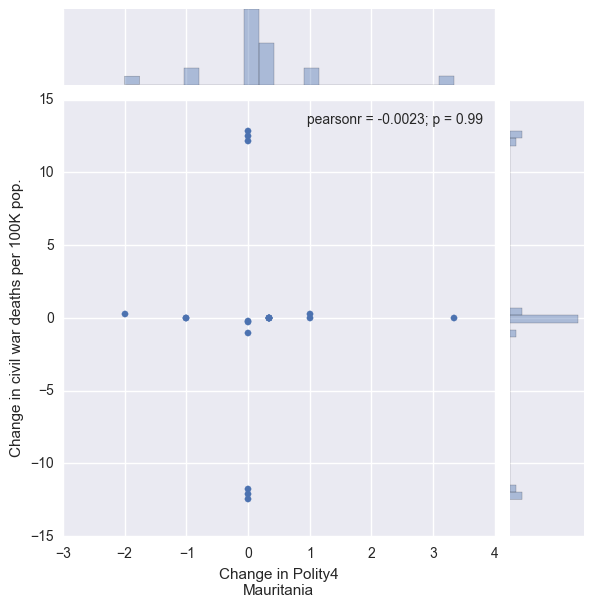

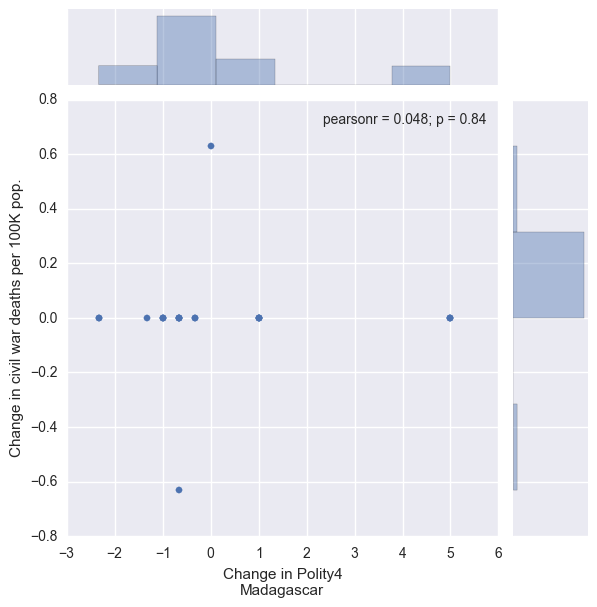

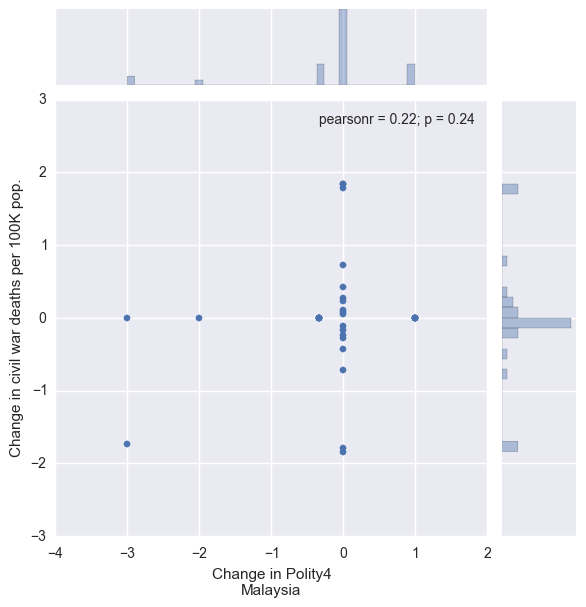

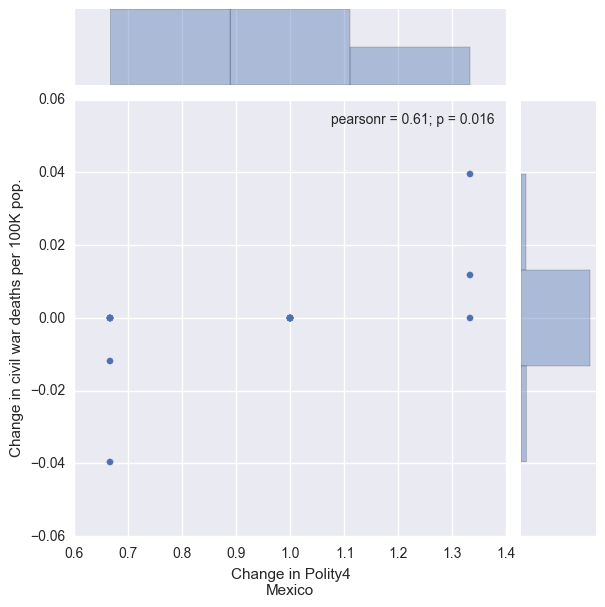

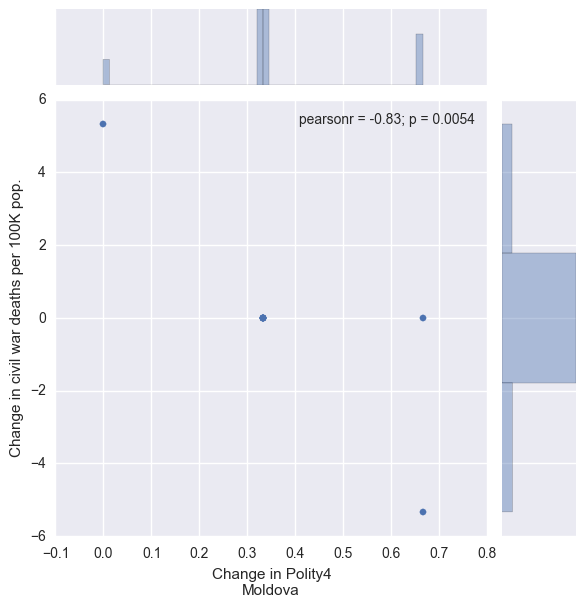

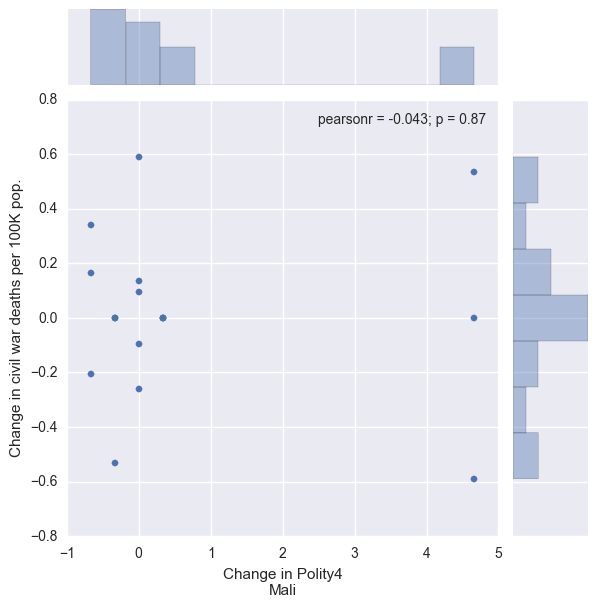

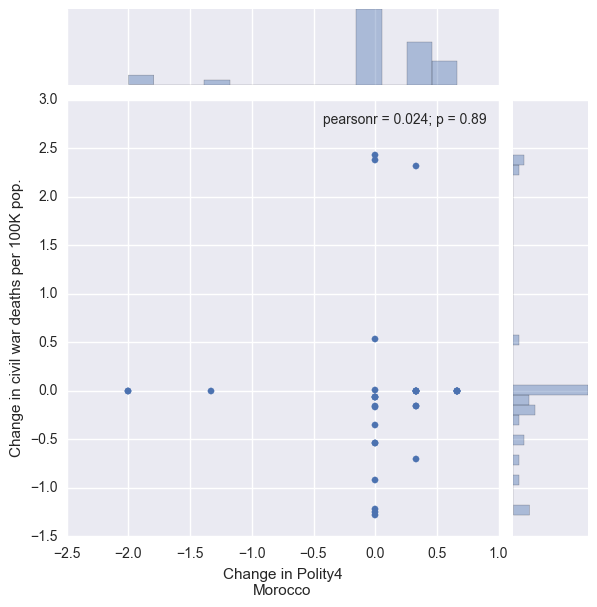

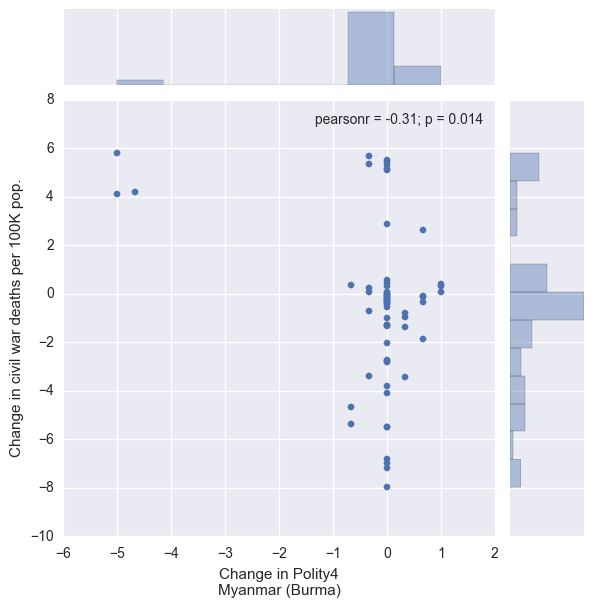

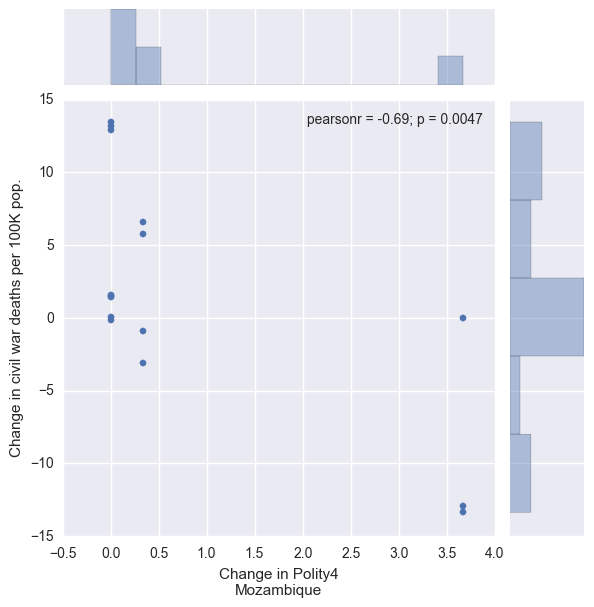

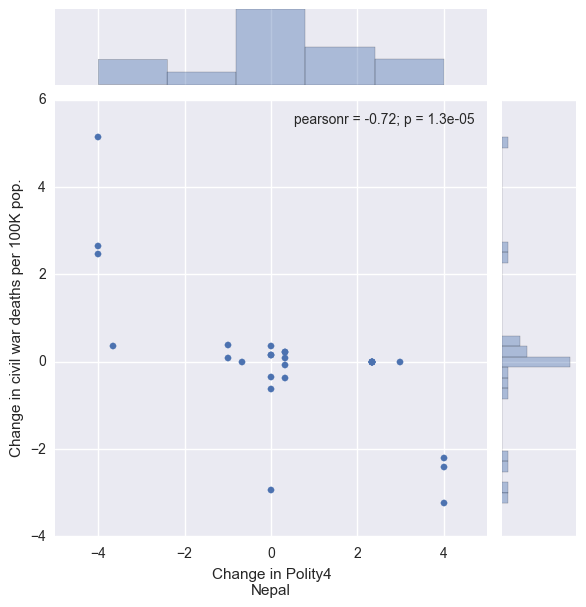

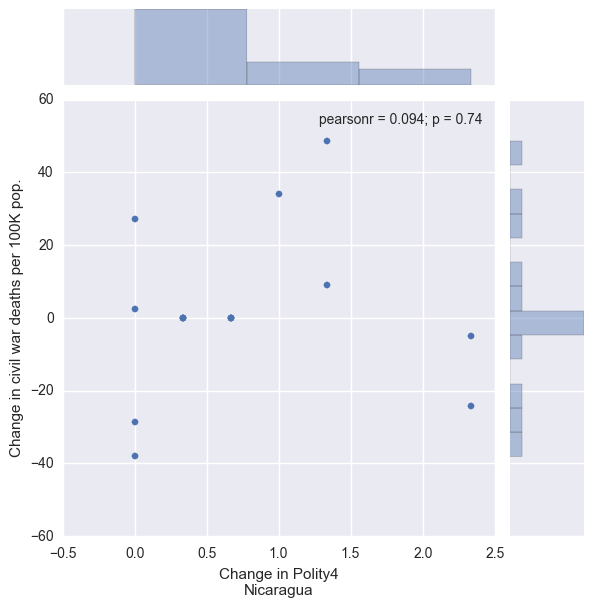

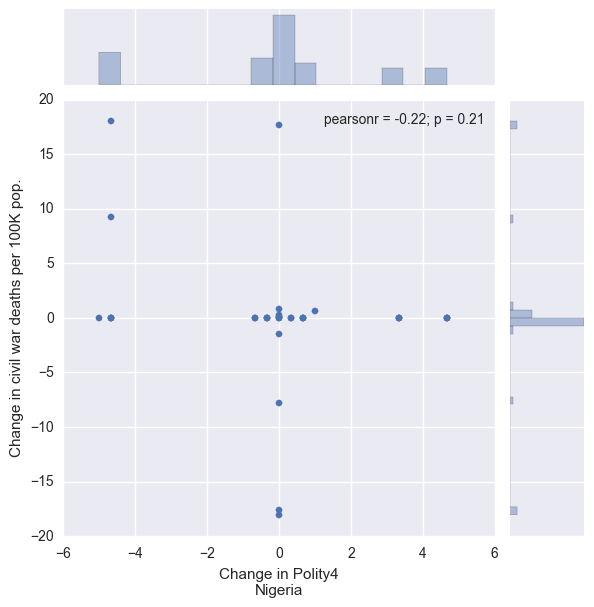

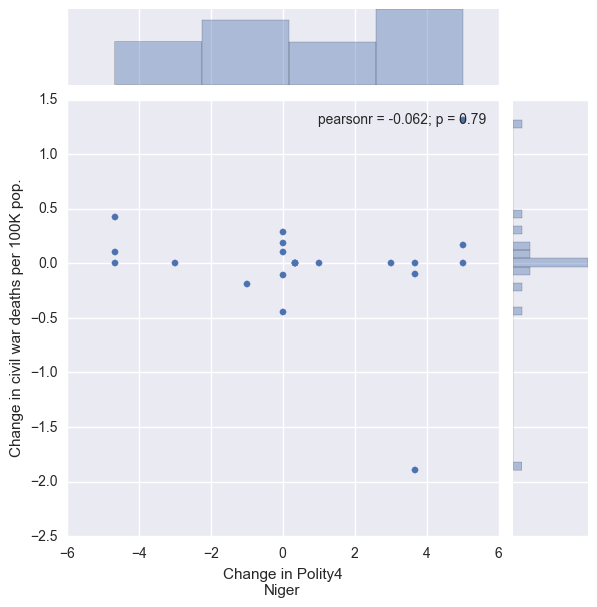

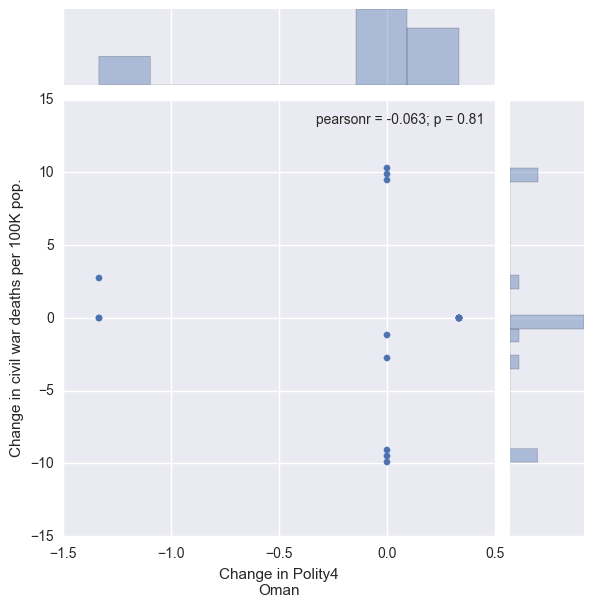

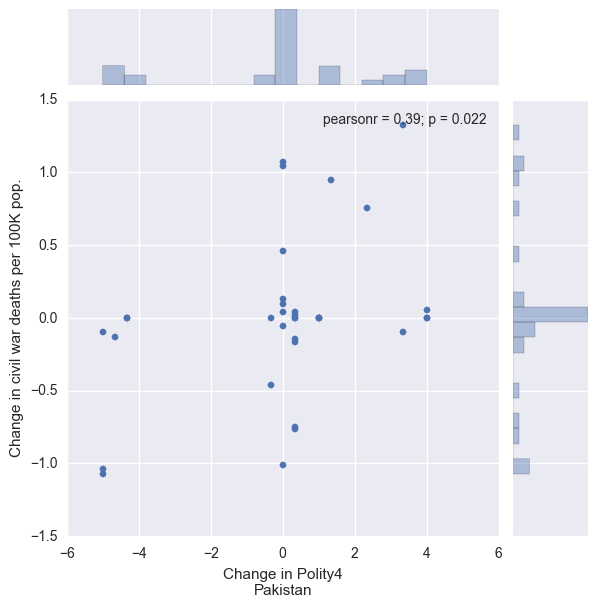

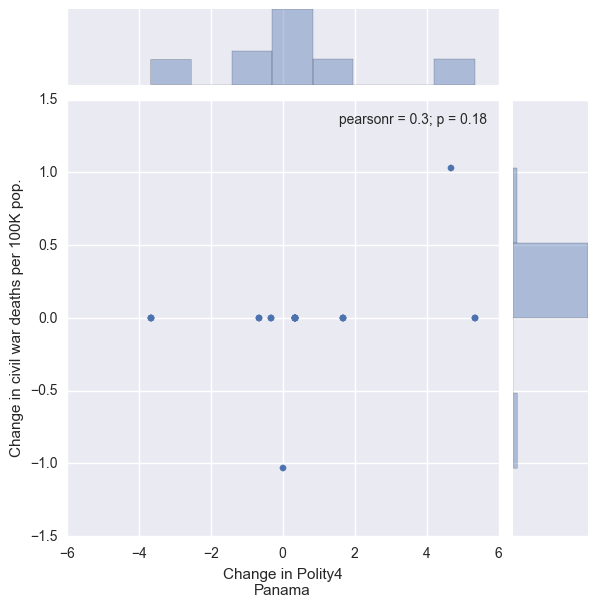

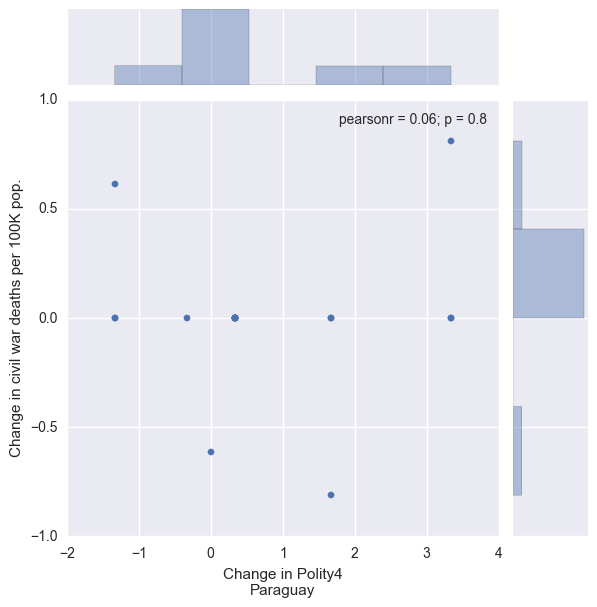

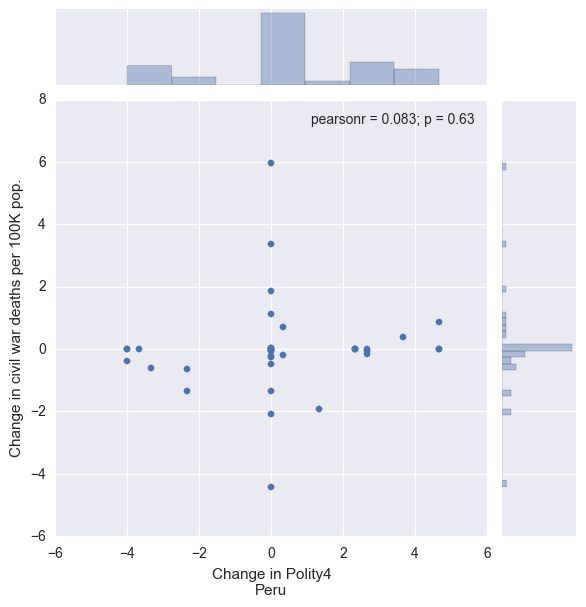

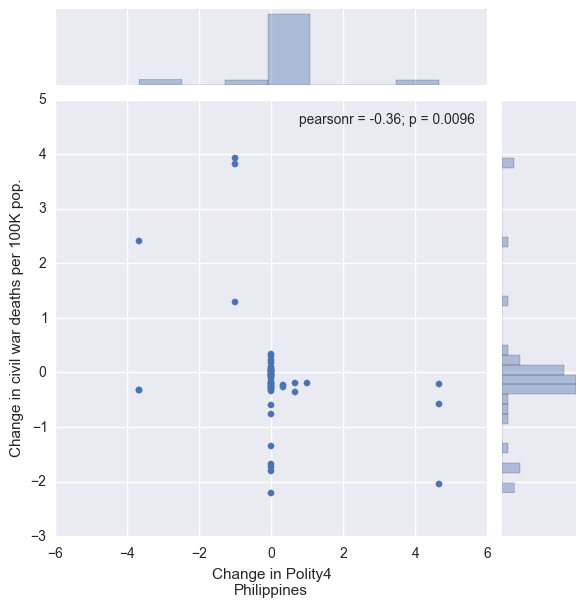

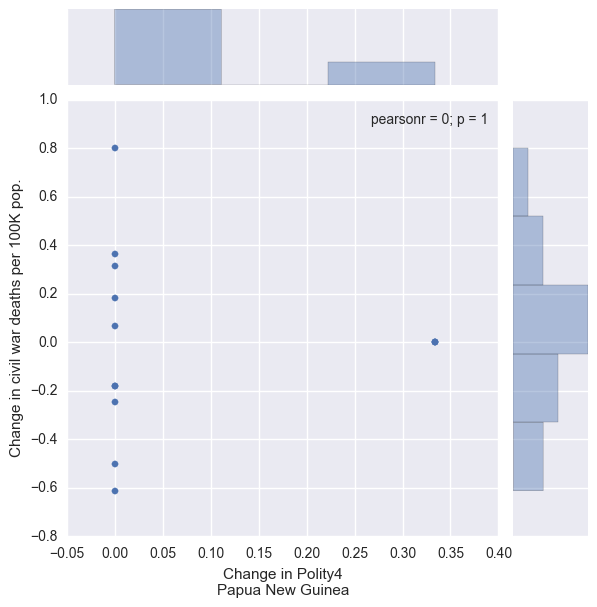

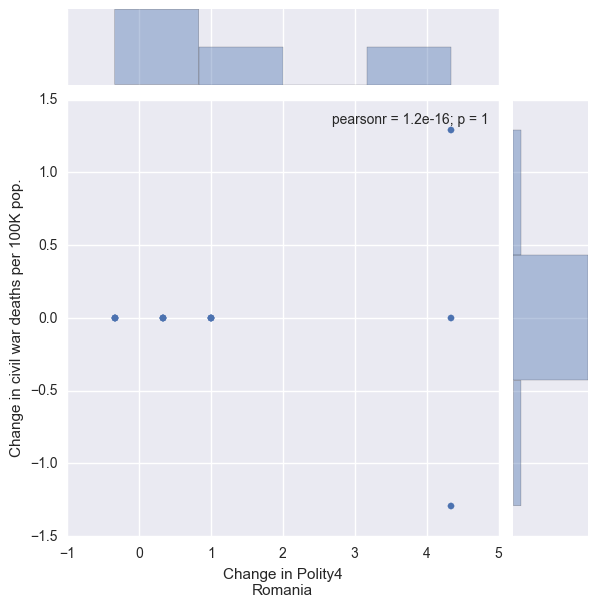

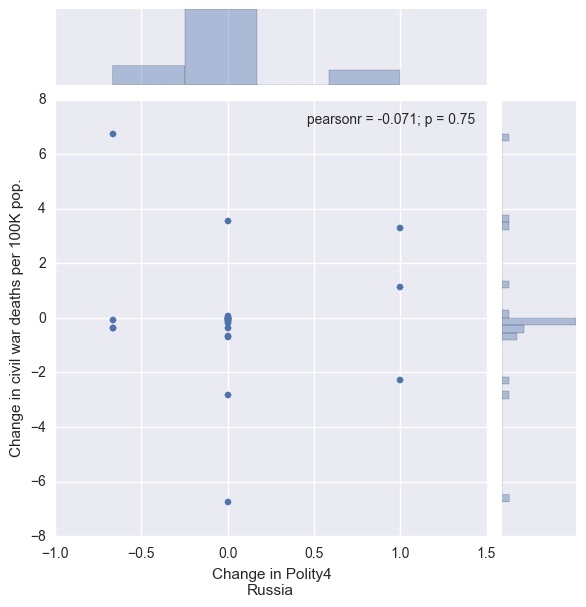

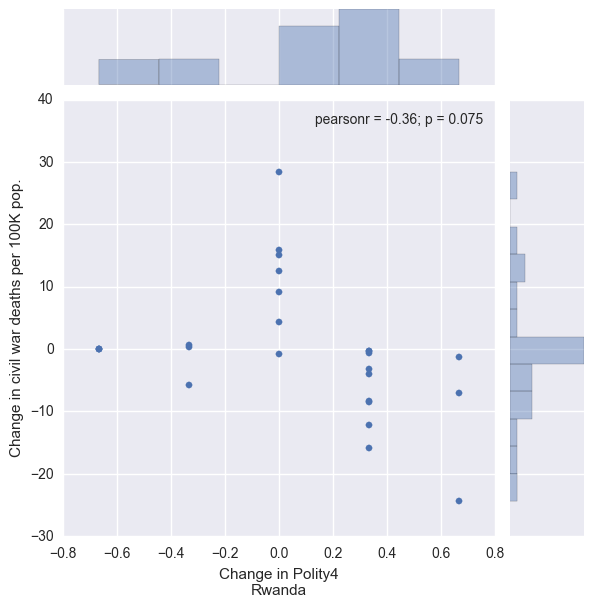

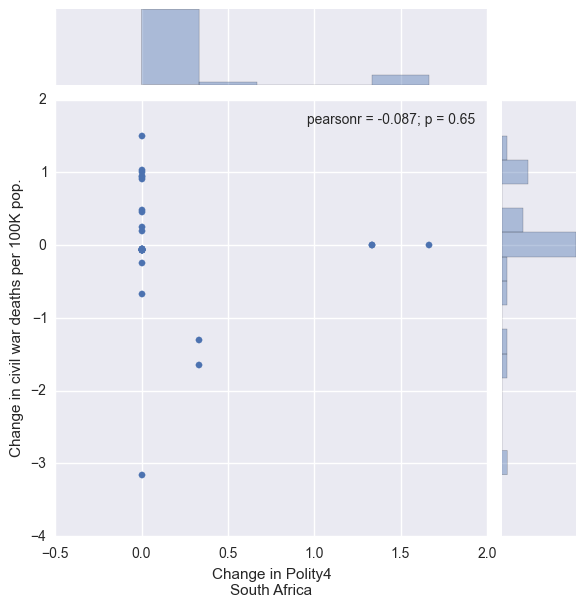

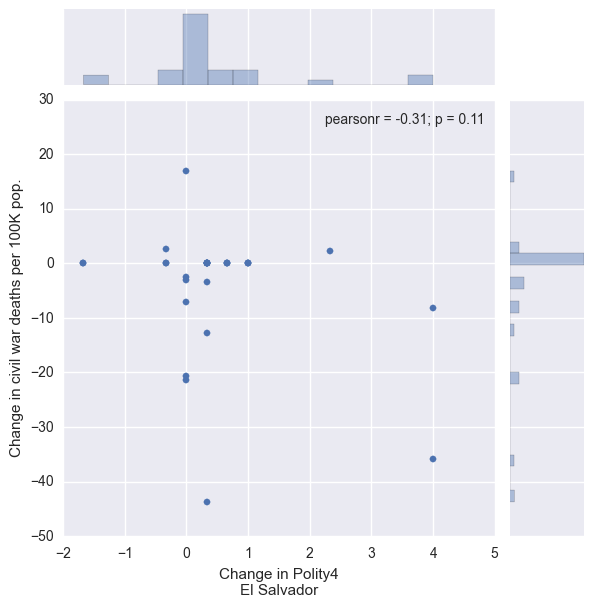

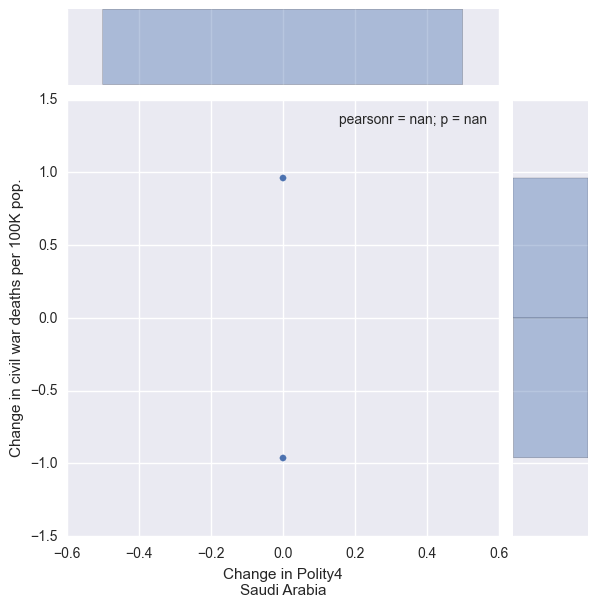

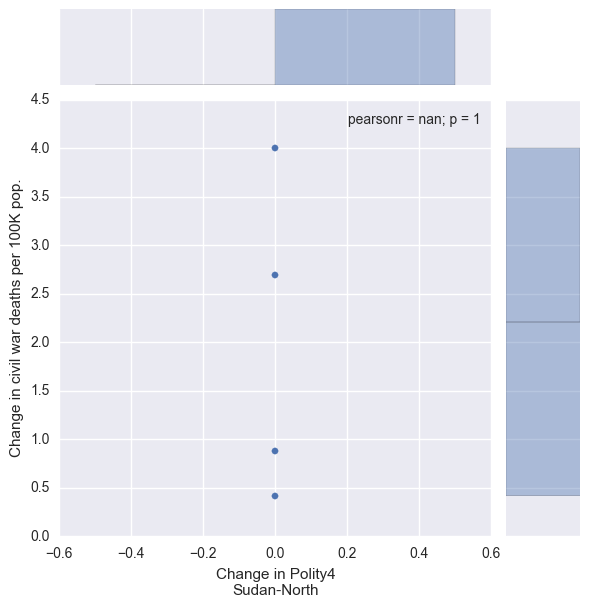

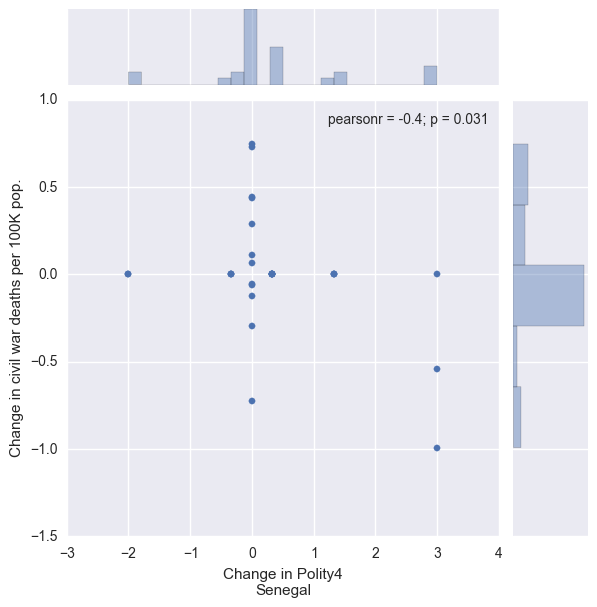

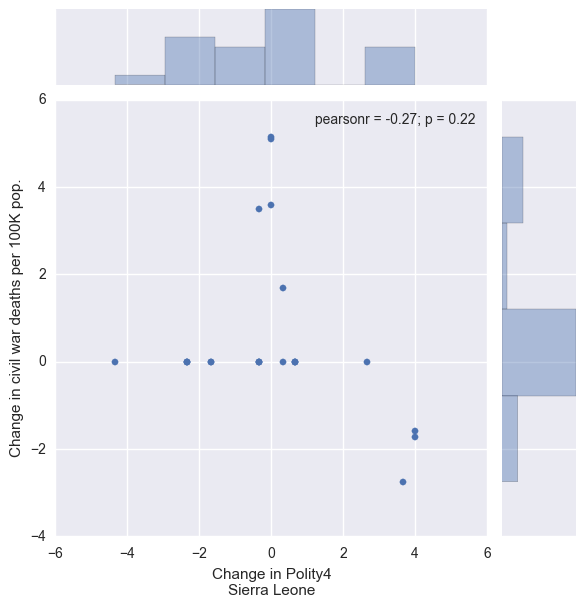

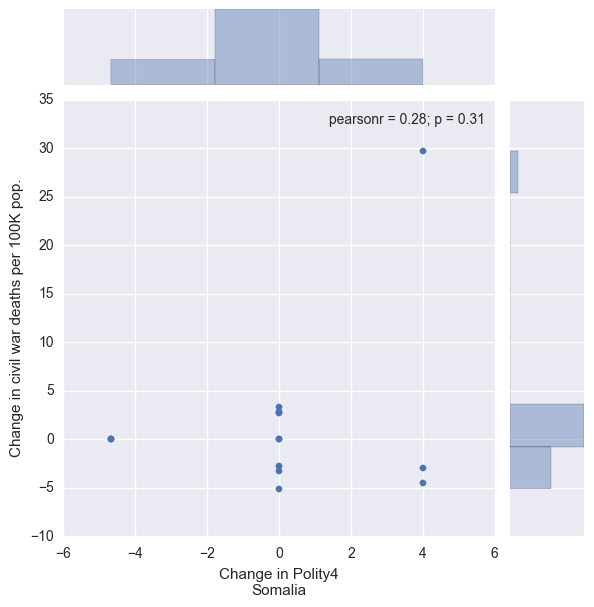

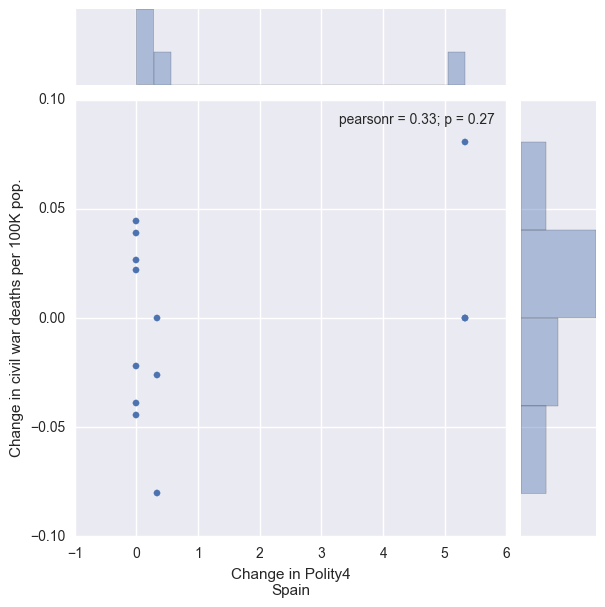

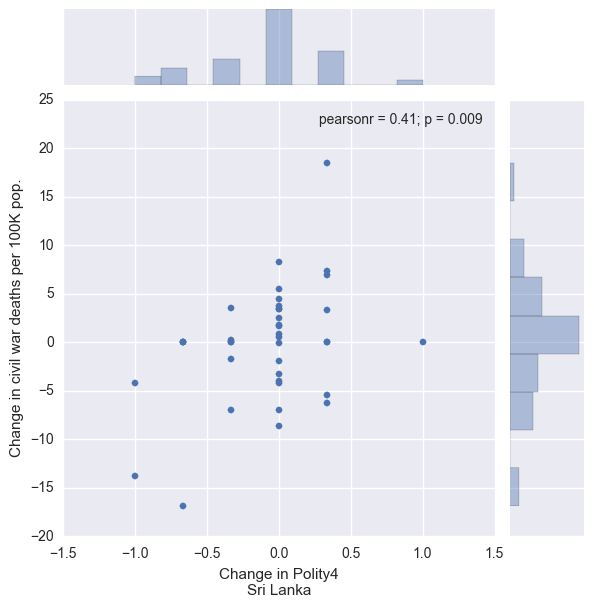

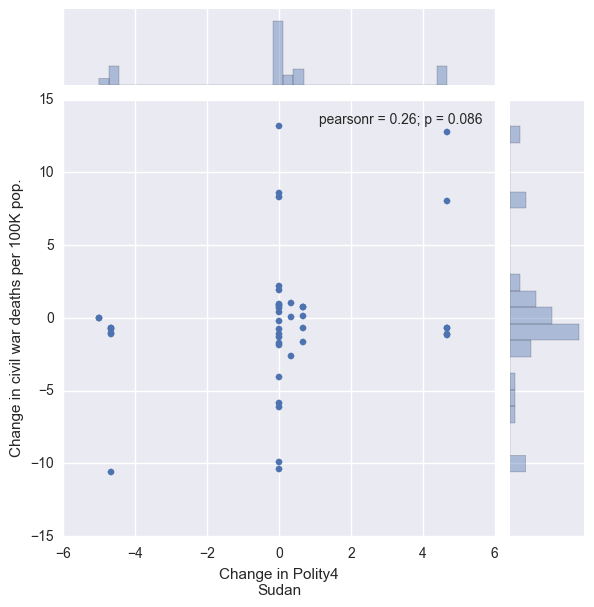

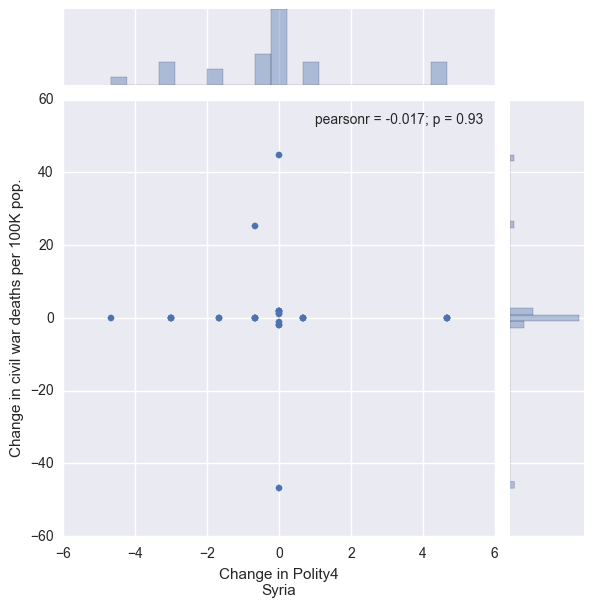

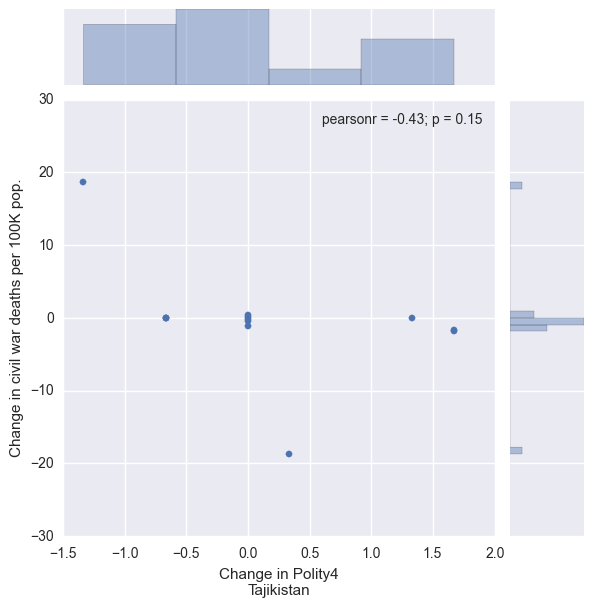

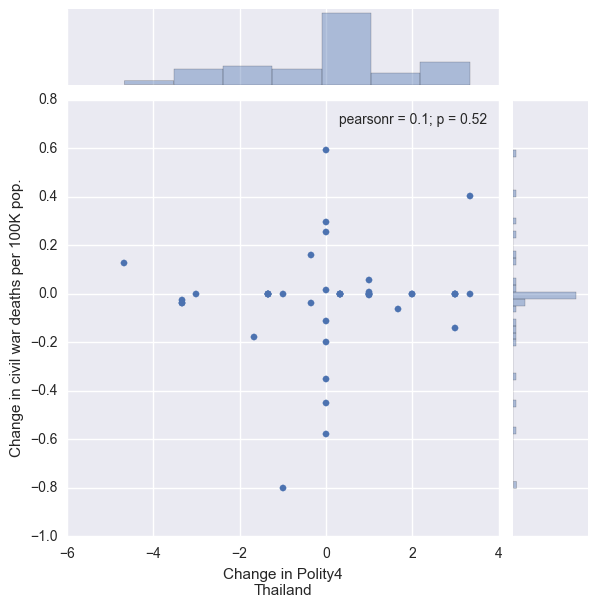

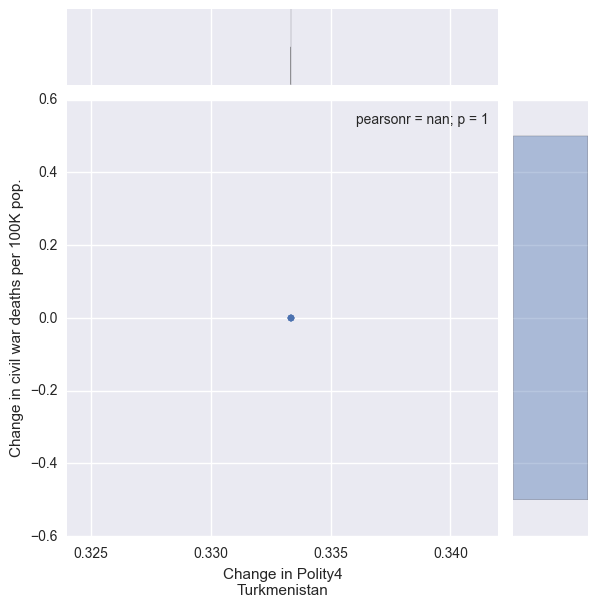

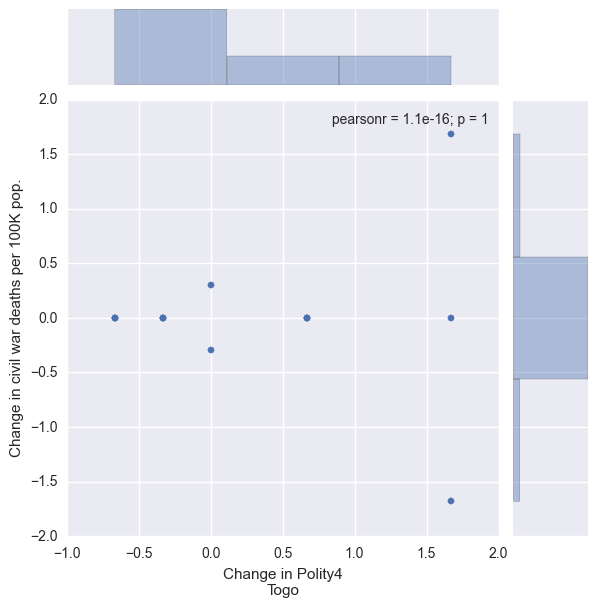

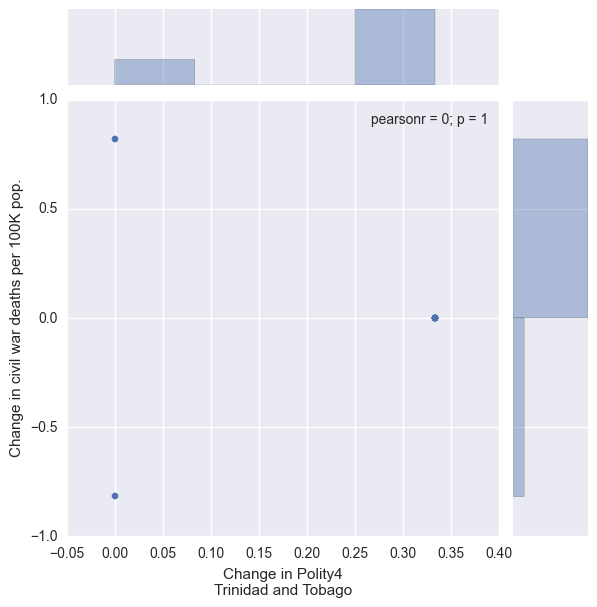

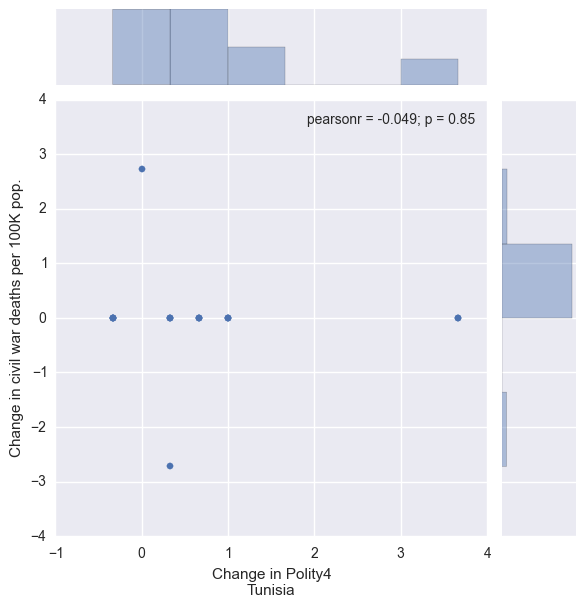

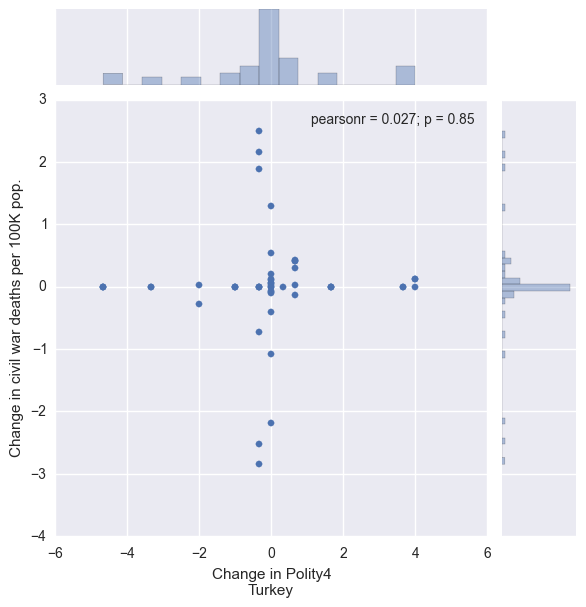

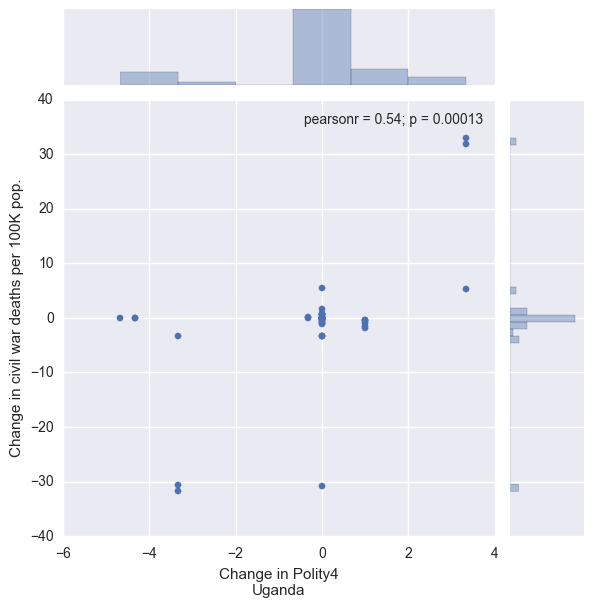

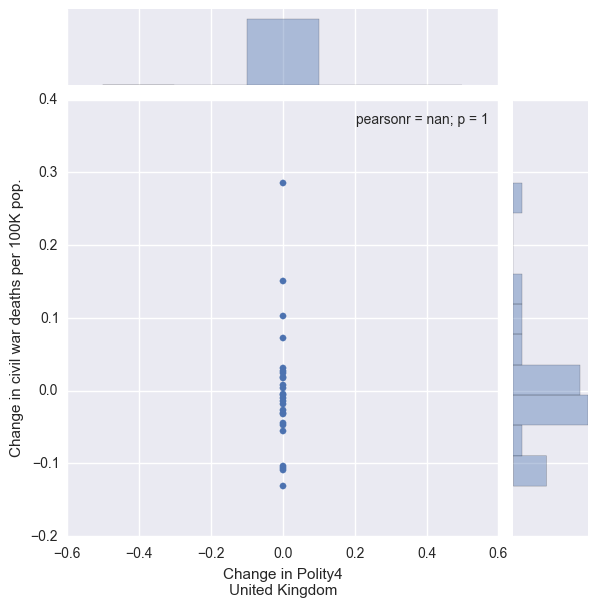

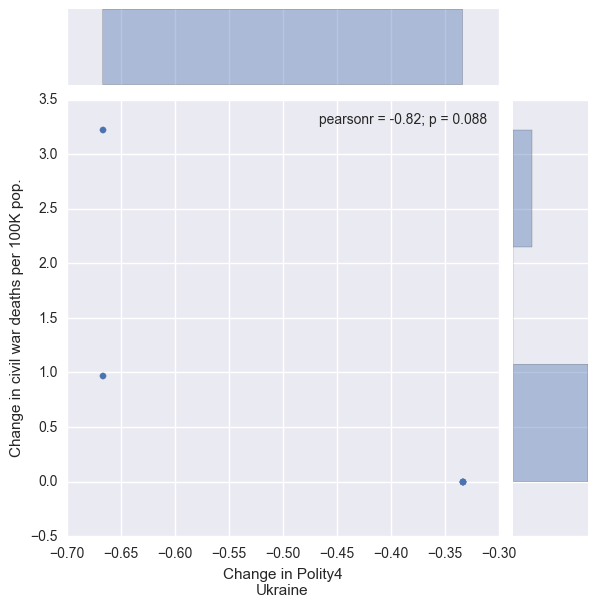

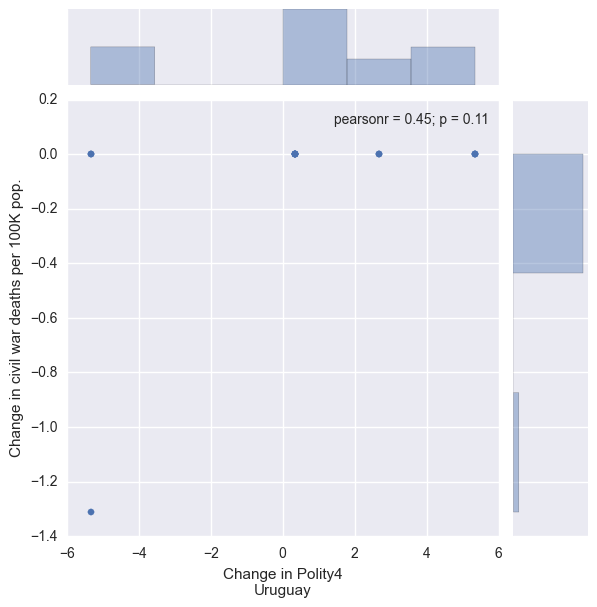

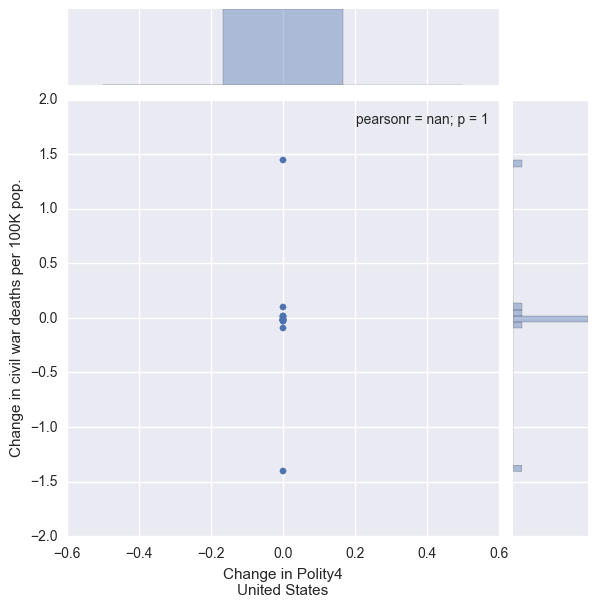

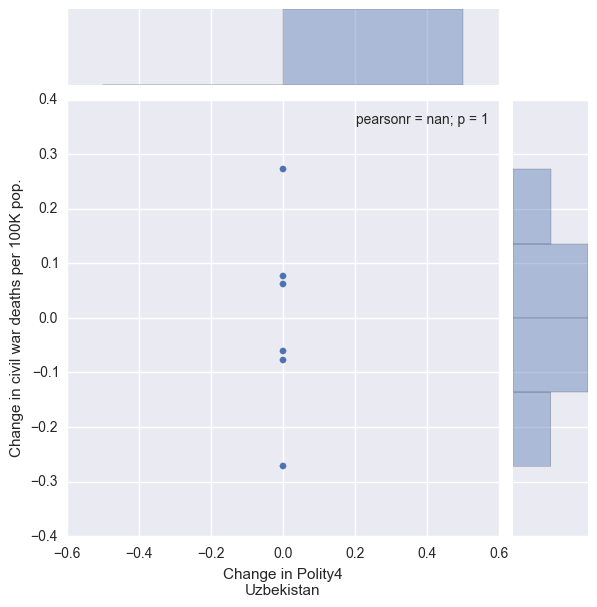

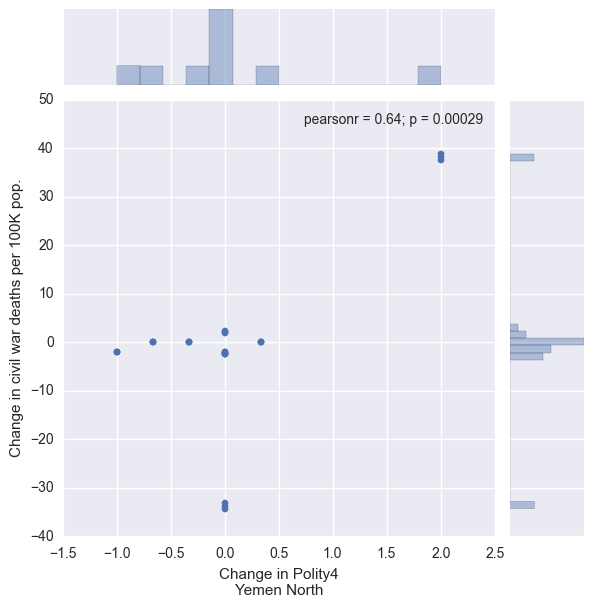

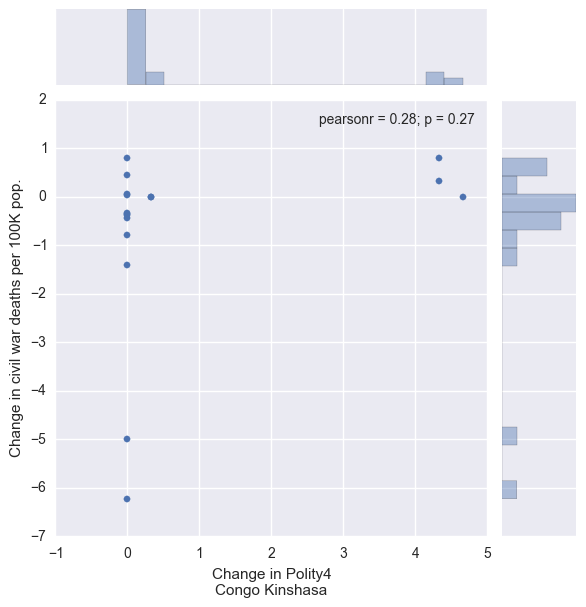

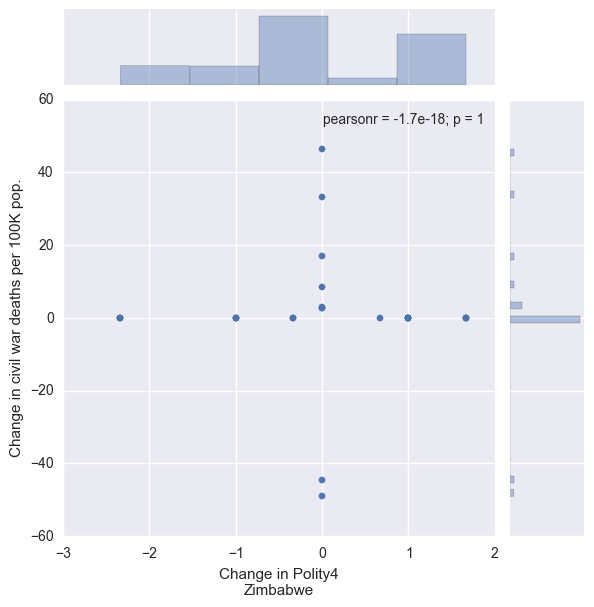

In [957]:
all_country_codes = merged_dp['ccode'].unique()
all_country_codes = all_country_codes.astype(str)

for c in all_country_codes:
    heatplot_data = merged_dp.loc[(merged_dp['ccode'] == c) &\
                              (merged_dp['delta_deaths_moving_avg'] > -50) &\
                              (merged_dp['delta_deaths_moving_avg'] < 50),\
                              ['delta_polity_moving_avg','delta_deaths_moving_avg']].fillna(0)
    heatplot_data = heatplot_data[(heatplot_data['delta_deaths_moving_avg'] != 0) | \
                              (heatplot_data['delta_polity_moving_avg'] != 0)]
    if heatplot_data['delta_polity_moving_avg'].count() > 0:
        #ax = plt.axes()
        title_text = merged_dp.ix[merged_dp.loc[merged_dp['ccode'] == c]['country'].first_valid_index(),'country']
        print(title_text)
        if (title_text != 'Guyana') & \
        (title_text != 'Libya')  & \
        (title_text != 'Zambia')  & \
        (title_text != 'Tanzania'):
            g = sns.jointplot('delta_polity_moving_avg','delta_deaths_moving_avg',data=heatplot_data)
            g.set_axis_labels("Change in Polity4 \n" + title_text, "Change in civil war deaths per 100K pop.")

In [959]:
def linePlotDeathPolity( country ):
    df = merged_dp.loc[merged_dp['country']==country,['year','polity','polity_moving_avg',\
                                                             'delta_polity_moving_avg','deaths_moving_avg',\
                                                             'delta_deaths_moving_avg']]
    df = df.set_index(['year'])
    plt.figure(); df.plot(y=['polity','polity_moving_avg','delta_polity_moving_avg',\
                      'deaths_moving_avg','delta_deaths_moving_avg'],figsize=(7,7));
    
    plt.figure()
    #ax = df.plot()

    #ax.set_ylabel('change in polity 4')
    #ax.right_ax.set_ylabel('change in civil war deaths')
    
    
    plt.subplot(211)
    df['delta_polity_moving_avg'].plot(x='year',y=['delta_polity_moving_avg'],figsize=(7,6), legend=True)
    plt.ylabel('change in polity 4')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)
    plt.subplot(212)
    df['delta_deaths_moving_avg'].plot(x='year',secondary_y=True,y=['delta_deaths_moving_avg'],figsize=(7,6), legend=True)
    plt.ylabel('change in civil war deaths per 100K pop')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.show()

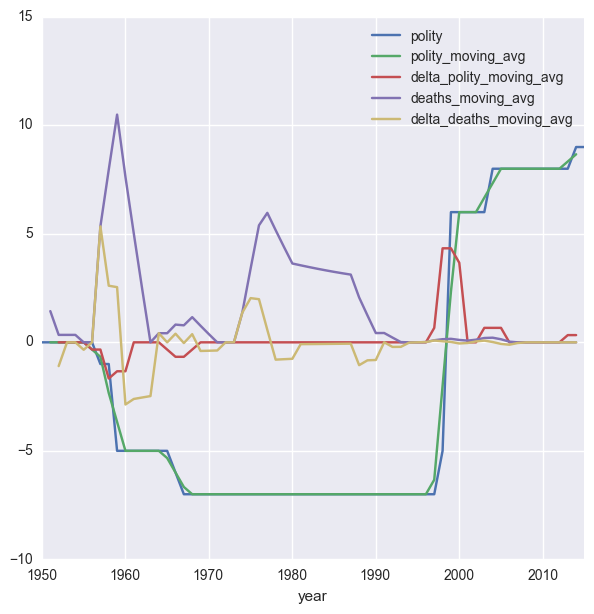

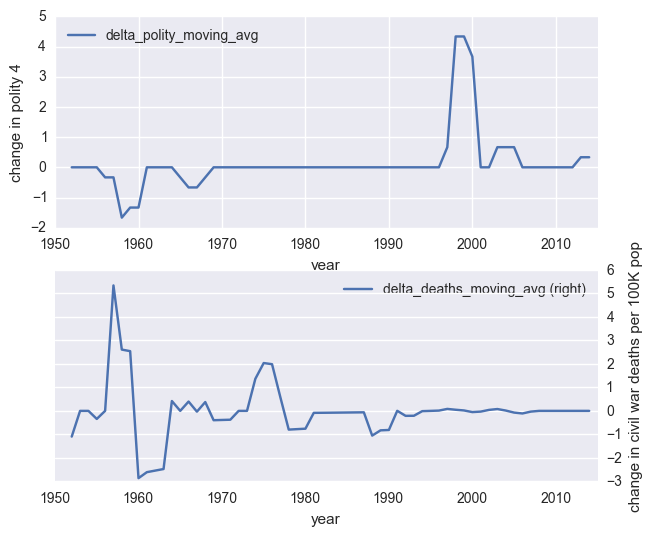

In [960]:
linePlotDeathPolity('Indonesia')

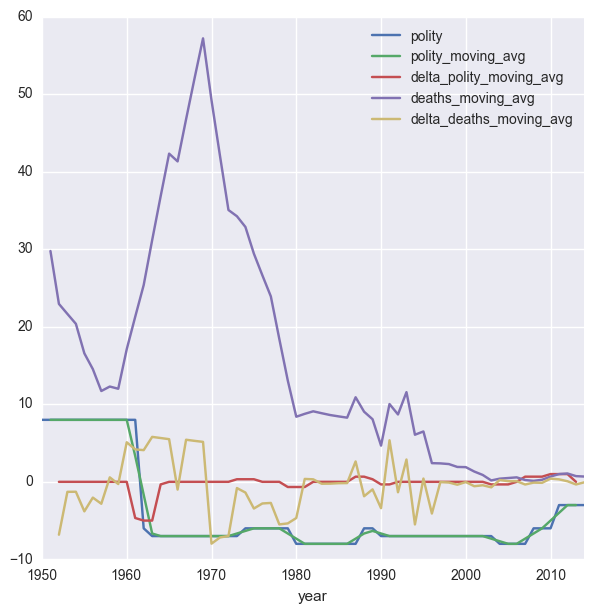

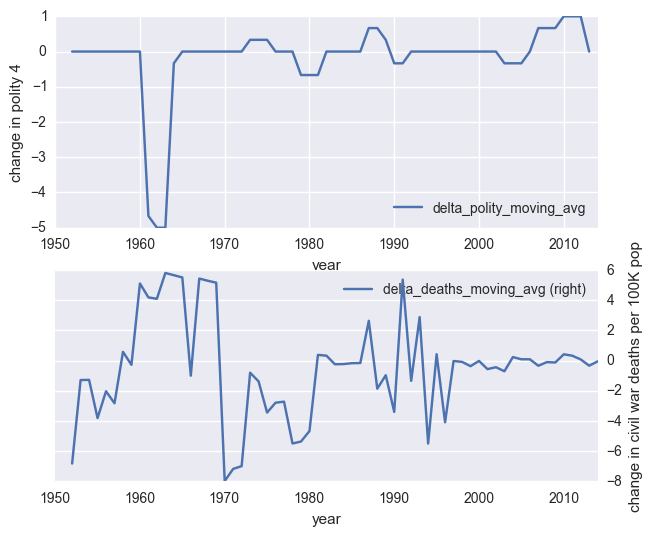

In [961]:
linePlotDeathPolity('Myanmar (Burma)')

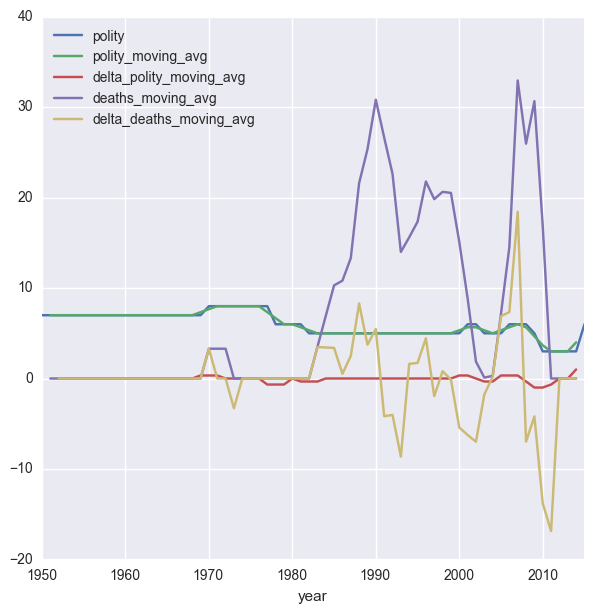

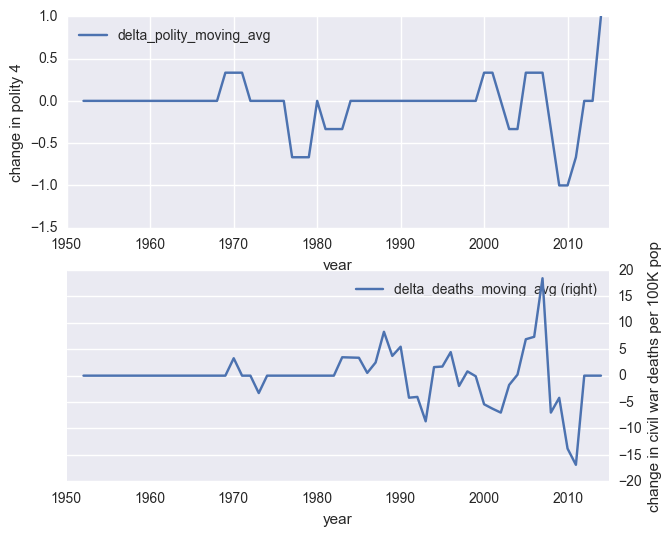

In [962]:
linePlotDeathPolity('Sri Lanka')

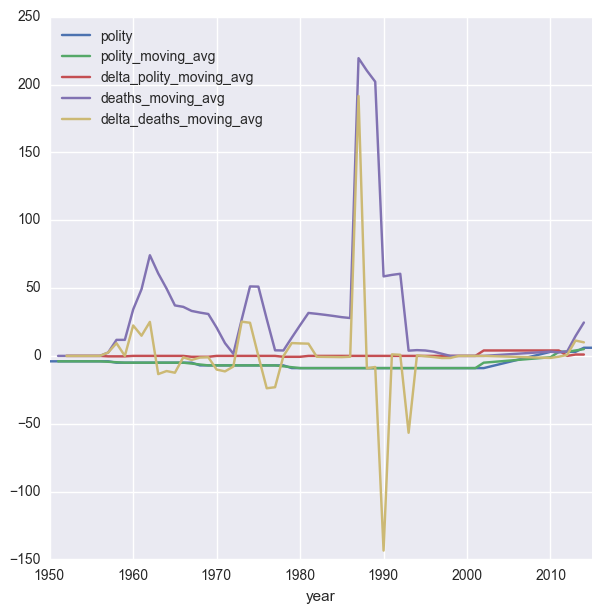

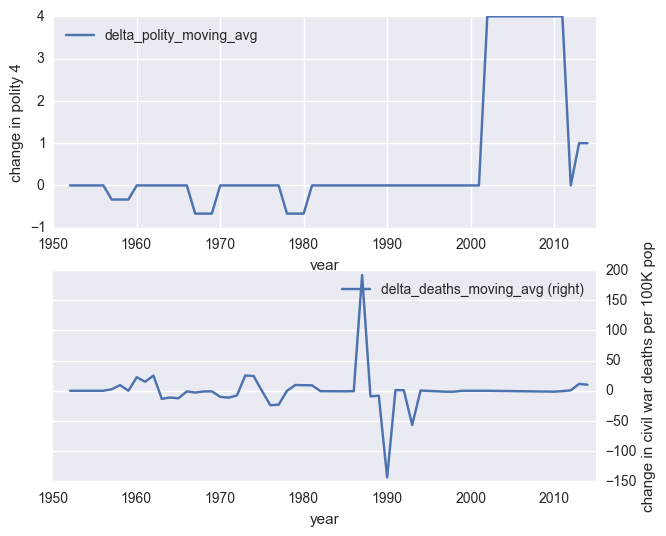

In [963]:
linePlotDeathPolity('Iraq')

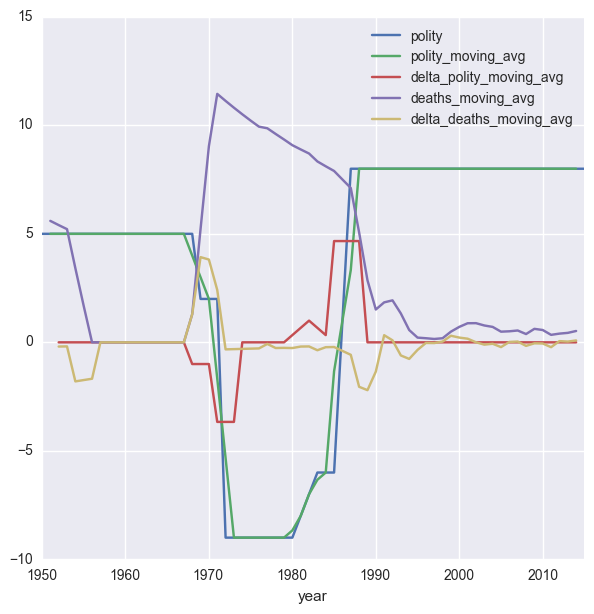

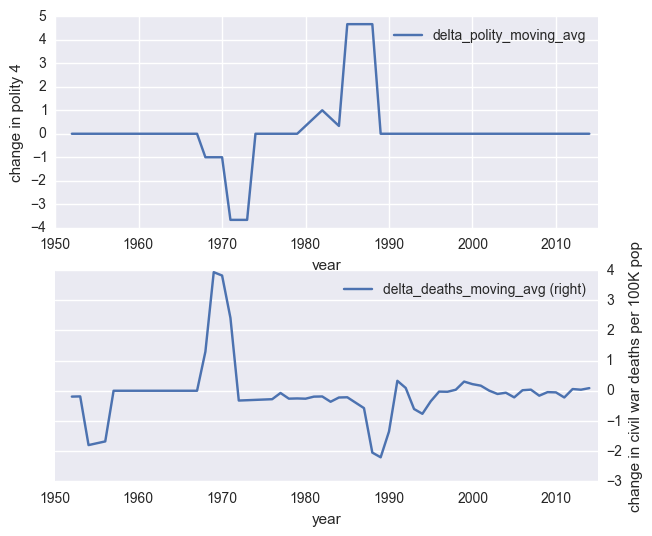

In [964]:
linePlotDeathPolity('Philippines')

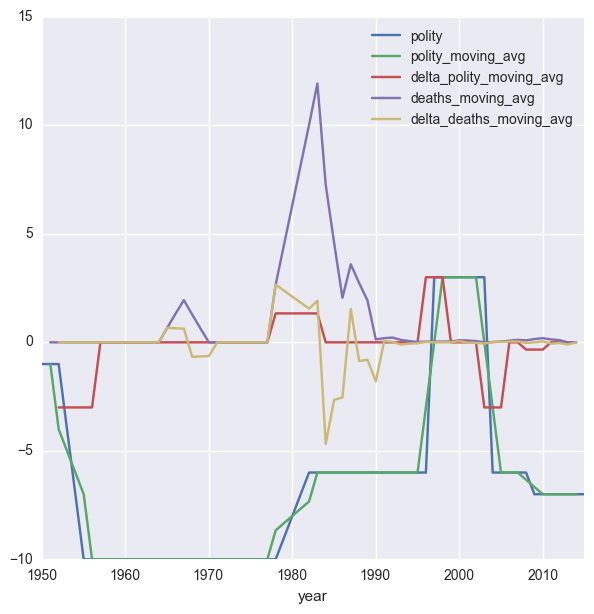

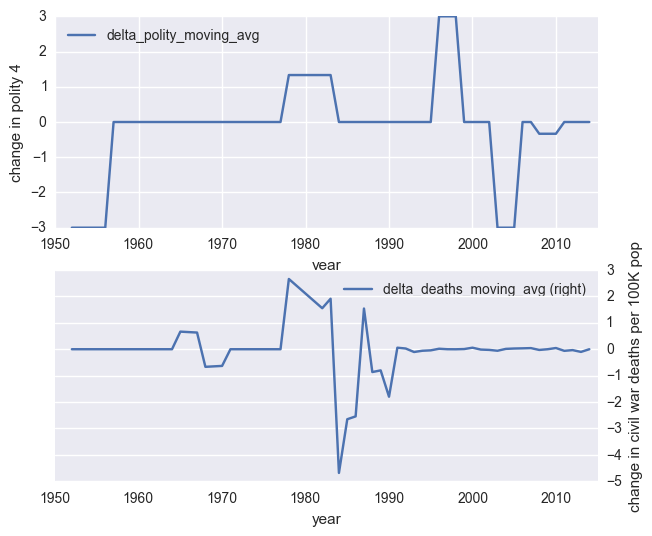

In [965]:
linePlotDeathPolity('Iran')

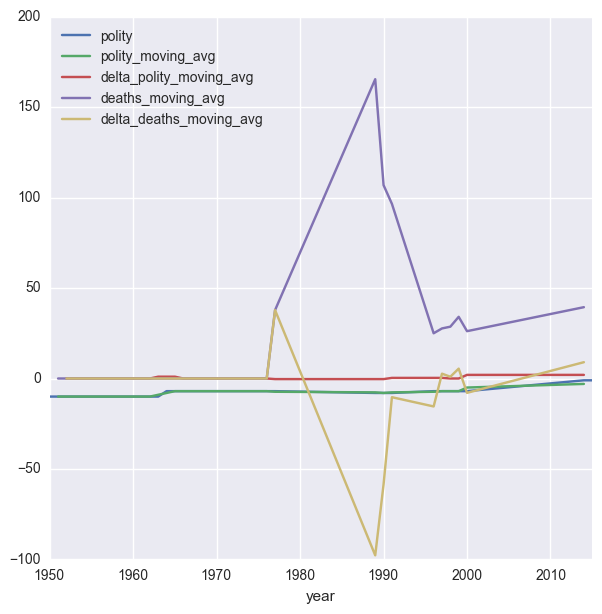

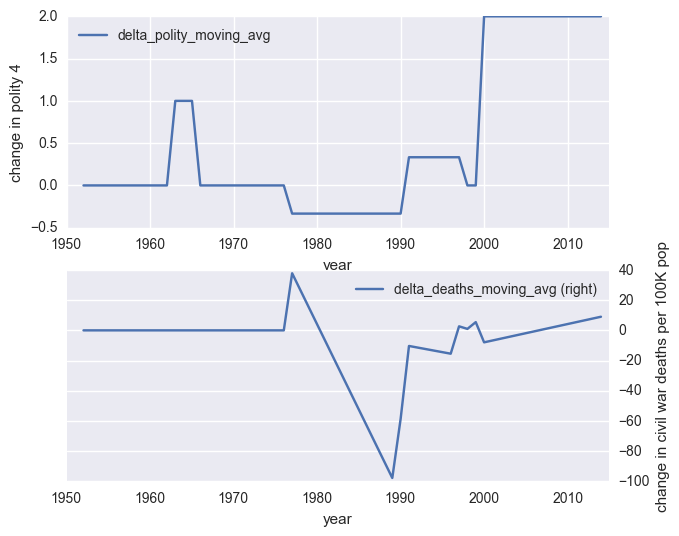

In [966]:
linePlotDeathPolity('Afghanistan')

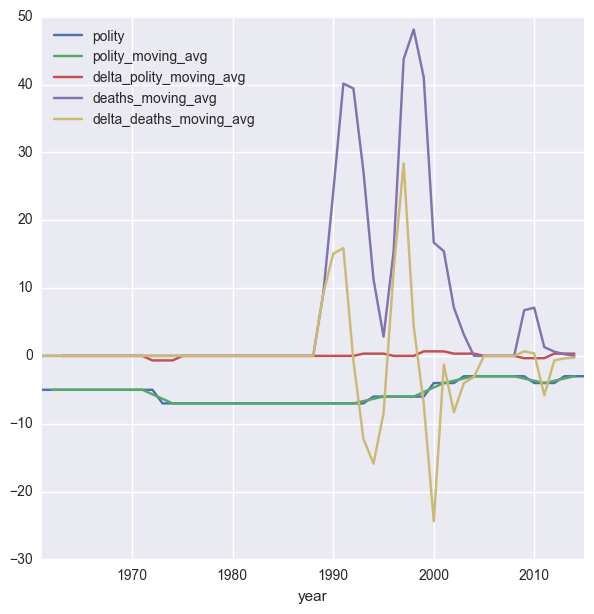

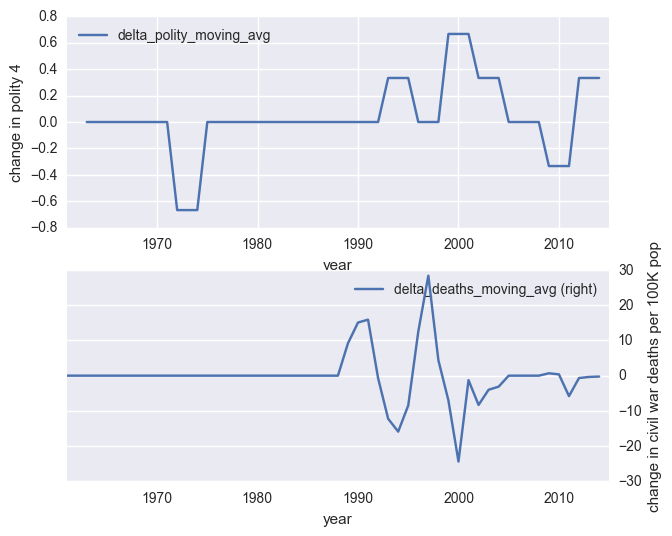

In [967]:
linePlotDeathPolity('Rwanda')

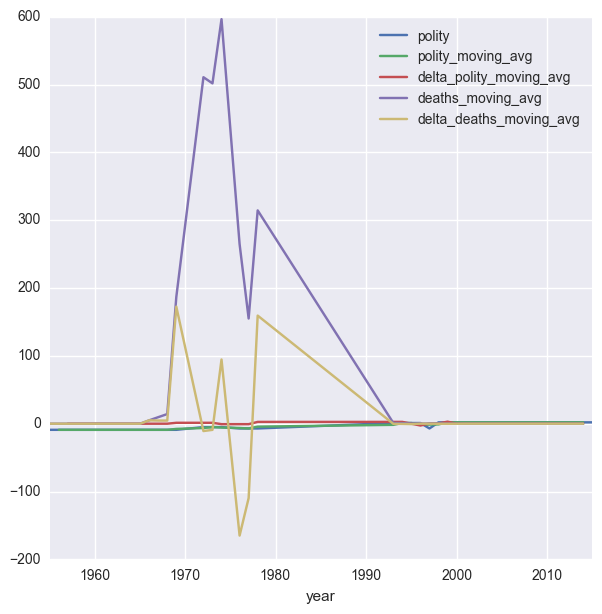

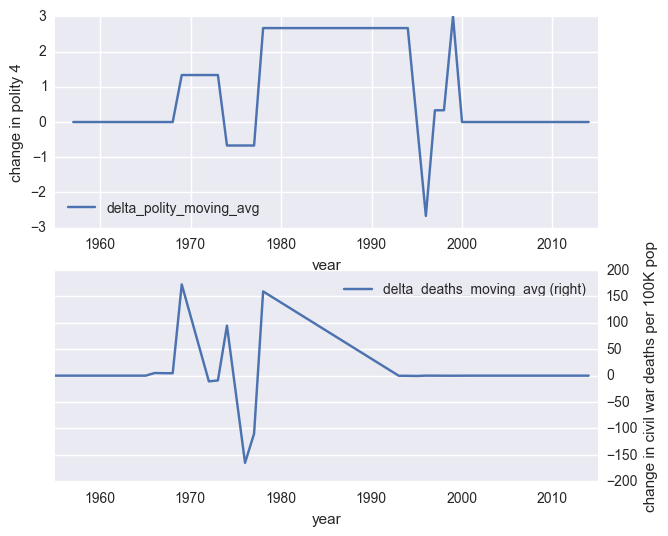

In [968]:
linePlotDeathPolity('Cambodia')

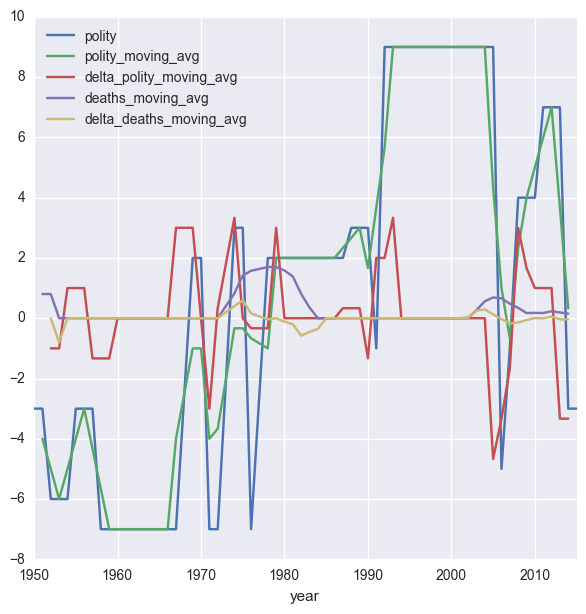

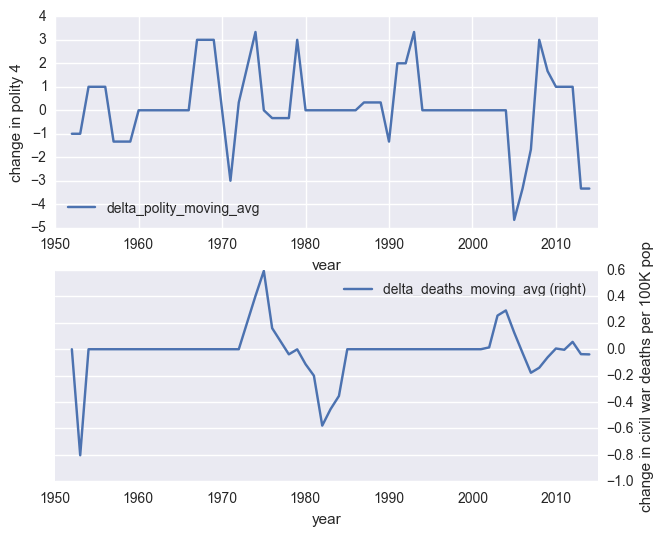

In [969]:
linePlotDeathPolity('Thailand')